# Introduction:

As an undergraduate, I became fascinated by the adaptability of antibodies to bind to specific parts of a molecule in real-time, effectively inactivating potential downstream usage of that bound moiety. This process by which antibodies are refined for such specificity reflects the evolutionary selection that all organisms undergo, making it all the more impressive. Antibodies can also interact with other molecules in the immune system, such as the complement cascade, which forms a complex signaling network that ultimately destroys invading pathogens. Antibodies are extremely cool.

It comes as no surprise that monoclonal antibodies (mAbs) have proven to be valuable in the fight against cancer. Clinical trials offer an exceptional opportunity to assess the efficacy of biologic agents like mAbs. Clinical trial data, which is carefully categorized and stored in archives like the US Government Archives and the NHS in the UK, can inform decision-making and contribute to the development of successful trials.

In this series of Jupyter notebooks, we explore clinical trials involving mAbs on solid tumors, utilizing API calls to ClinicalTrials.gov and PySpark for efficient data processing and analysis. Our objective is to perform an exploratory data analysis, complete3 with graphs and charts. If you've never done such a thing and are interested, you can look at these databook and use them as a guide. I will explain the code with interior markups as well as things that you should be looking for.

In this particular notebook, we will just explore some aspects of clinical trials as they relate to Monoclonal Antibodies and Combination/Polytherapies to patents with **solid tumors**. This effort can be descibed as exploratory data analysis. EDA is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. We'll throw in a few tables and even try some inital modelling for illustrative purposes.


**CAUTION**: Yes, we know that chat-GPT is out there and can help you write code such as I've written here. In fact, I, too, have used chat-GPT to write code where I was unsure of the best way to approach things. Further, I cut and pasted code into chat-GPT so it would ,mark it up in comments.*However: you must learn at least the basics of Python, libraries such as NumPy, Pandas, plotting libraries such as Seaborn and matplotlib. If you are going to model, you must learn things like scikit-learn, and ML theory in general.* The reason you need to know this is that chat-GPT is error-prone, often writes functions without calling said functions, can write long form code that doesn't meet your specifications, Garbage-in: Garbage-out. **SO at the very least: be good at reading code** You should focus on the library data form as JSON, the data form most used in the output of such clinical data is in JSON (which is a library). So if you are a beginner- read on because I am demonstrating how to get data from a **Public Data Base**. Public data bases can serve as a fantastic resource into getting clinical data. Here we focus on clinical cancer data and there are numerous databases to get very specific information on cancer. There are several public databases that can serve as a source of clinical data about cancer. These databases can be used to identify patient populations, investigate treatment outcomes, and study disease progression. Some of the most commonly used databases include:

1. Surveillance, Epidemiology, and End Results (SEER): SEER is a program of the National Cancer Institute that collects and publishes cancer incidence and survival data from population-based cancer registries covering approximately 35% of the U.S. population.

2. National Cancer Database (NCDB): NCDB is a joint program of the American College of Surgeons Commission on Cancer and the American Cancer Society. It collects data on cancer incidence, treatment, and outcomes from more than 1,500 hospitals across the United States.

3. CancerLinQ: CancerLinQ is an initiative of the American Society of Clinical Oncology (ASCO) that collects and analyzes data from electronic health records (EHRs) to improve the quality of cancer care. The database currently contains data on over 1 million cancer patients.

4. ClinicalTrials.gov: ClinicalTrials.gov is a registry and results database of publicly and privately supported clinical studies of human participants conducted around the world. It contains information on over 400,000 clinical trials, many of which include data on cancer patients.

5. Cancer Research UK Clinical Trials Database: This database provides information on cancer clinical trials conducted in the UK and covers all types of cancer, as well as the latest treatment approaches.

These databases can provide valuable insights into the epidemiology, diagnosis, and treatment of cancer, and can help researchers identify areas where new research is needed. However, it's important to note that there may be limitations in the data available in these databases, and researchers need to be careful to ensure that their analyses are appropriate for the available data.

You should also know about some shortcoming of using public data-bases:

**Shortcomings of just ClinicalTrials.gov:**

1. Incomplete information: Although ClinicalTrials.gov is a comprehensive database of ongoing and completed clinical trials, some trials may not be listed on the site. Additionally, some trials may be listed with incomplete or inaccurate information, making it difficult to interpret the results.

2. Bias: ClinicalTrials.gov relies on trial sponsors to submit their data, and there may be a bias towards trials that are more likely to produce positive results. This can make it difficult to get an accurate picture of the efficacy of a particular treatment.

3. Time lag: There may be a time lag between when a trial is completed and when the results are published on ClinicalTrials.gov. This can make it difficult to stay up to date with the latest research in a particular field.

4. At first, you can get a cap of 10,000 studies. However, if you keep querying the DataBase, you will not not be able to get more than ~200 studies. This can cause headaches.


Shortcomings of public databases:

1. Data quality: The quality of the data in public databases can vary widely, depending on the source of the data and the methods used to collect it. Researchers need to be careful to verify the accuracy of the data before using it in their studies.

2. Incompatibility: Public databases may use different data formats and structures, which can make it difficult to integrate data from multiple sources. Researchers may need to spend a significant amount of time cleaning and restructuring the data before it can be used.

3. Limited scope: Public databases may only contain data on a specific subset of the population, such as patients with a particular disease or participants in a specific clinical trial. This can limit the generalizability of the findings and make it difficult to draw broader conclusions.


Which brings us to our next topic: We will be carrying out API calls on ClicicvaslTrials.gov. Thus you need to familarize yourself to with libraries such as `requests`, `json` and of course `pandas`. Later we will be using Apache Spark and Pyspark to handle our requests and parse the data. We will be using files such as parquet files so we can save disk-space on our local machines. You should familaiarize yourselves with these tools.

All that said, I performed all these analyses on my Macbook Pro. No cloud assitance weas needed for these queries. However, we will use such tools later on in this series.


**NOTE** I have not defined a `random seed` anyplace in this notebook. So if you try to run it on your own machine, your results might be different. 

**A Note for Prospective Cancer Patients:** This Jupyter notebook is designed to provide valuable insights and information on clinical trials involving monoclonal antibodies for solid tumors. If you are a patient seeking information about your specific condition, this notebook can serve as a starting point for understanding the landscape of available clinical trials and potential treatment options. However, it is crucial to recognize that using code and data analysis without a thorough understanding of the underlying concepts can lead to inaccurate or misleading results. It is always best to consult with your healthcare provider and rely on their guidance before making any decisions about your treatment. Additionally, remember that the data provided here is subject to change, as new trials are conducted and new treatments become available. Always verify the most current information with trusted sources and seek professional advice to ensure you are making informed decisions about your health.

In [265]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



**Here is our entry point into the world of clinical trials. The code below retrieves information about a clinical study from a website using Python's requests library and parses the response as a JSON (JavaScript Object Notation) object. Here is a line-by-line explanation:**

url = "https://tinyurl.com/yc89mccn" I wanted to make this first notebook look less formidable, I compressed the url.

* A variable called url is created and assigned the value of the URL for the clinical study information. In this case, a shortened URL is used for readability.
`response = requests.get(url)`

* A GET request is sent to the URL using the requests.get() function from the requests library. The response from the server is stored in the response variable.
`response_str = response.content.decode("utf-8")`

* The response content is in bytes format, so it is decoded into a string using the decode() method with the "utf-8" encoding. The resulting string is stored in the response_str variable.
`response_json = json.loads(response_str)`

* The decoded string is parsed as a JSON object using the json.loads() function from the json library. The resulting JSON object is stored in the response_json variable.
`study_fields = response_json["StudyFieldsResponse"]["StudyFields"]`

The JSON object contains nested dictionaries, and the information about the study is stored in the "StudyFields" key within the "StudyFieldsResponse" key. This information is extracted and stored in the study_fields variable for further processing.
Overall, this code retrieves clinical study information from a website and converts it into a JSON object for further analysis and manipulation in Python.







In [266]:
url = "https://tinyurl.com/yc89mccn"  # note I use `tinyurl` to make this readable
response = requests.get(url)

# Convert the byte string to a string we humans read
response_str = response.content.decode("utf-8")

# Parse the string as JSON (think dictionary data form)
response_json = json.loads(response_str)

# Access the study fields
study_fields = response_json["StudyFieldsResponse"]["StudyFields"]

**This code retrieves 1000 clinical studies** 

In [267]:
number_of_trials = len(study_fields)
print(number_of_trials)

1000


In [268]:
# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(study_fields)

# Display the first few rows of the DataFrame- just a regular pandas df using the head() function
print(df.head())

   Rank          NCTId                                         BriefTitle  \
0     1  [NCT04895566]  [Phase 0/1 Local Application of the Monoclonal...   
1     2  [NCT04895137]  [mFOLFOX6+Bevacizumab+PD-1 Monoclonal Antibody...   
2     3  [NCT05557903]  [Phase Ⅰ Clinical Study of Anti-CD52 Monoclona...   
3     4  [NCT05039580]  [Programmed Cell Death Protein-1 (PD-1) Monocl...   
4     5  [NCT04198623]  [Efficacy of Montelukast in Reducing the Incid...   

  OverallStatus            StartDate PrimaryCompletionDate         StudyType  \
0   [Completed]       [May 24, 2021]      [March 10, 2023]  [Interventional]   
1  [Recruiting]        [May 1, 2021]         [May 1, 2022]  [Interventional]   
2  [Recruiting]  [December 20, 2021]   [December 30, 2022]  [Interventional]   
3  [Recruiting]       [May 15, 2021]      [April 30, 2023]  [Interventional]   
4  [Recruiting]     [March 20, 2020]  [September 20, 2023]  [Interventional]   

             Phase EnrollmentCount InterventionType  \
0

The `df = df.applymap(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)` in the next cell is applied to a pandas DataFrame (df) and is used to convert *list values* containing only a single elements into single values. This is done using the applymap() function, which applies a given function to each element of the DataFrame. In this case, the lambda function checks if the element is a list and has only one item, and if so, it replaces the element with the single value from the list.

The purpose of this step is to simplify and clean the DataFrame by removing unnecessary list structures that can make data manipulation and analysis more complicated. This step can be particularly useful when working with data that has been scraped from websites, parsed from various file formats, or processed through APIs, as these processes can sometimes generate lists containing single elements instead of simple scalar values.

The print(df.head()) line at the end of the code snippet is used to display the first few rows of the cleaned DataFrame, allowing you to verify that the transformation has been applied correctly and observe the resulting data structure.

In [269]:
# Convert list values to single values
df = df.applymap(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

print(df.head())

   Rank        NCTId                                         BriefTitle  \
0     1  NCT04895566  Phase 0/1 Local Application of the Monoclonal ...   
1     2  NCT04895137  mFOLFOX6+Bevacizumab+PD-1 Monoclonal Antibody ...   
2     3  NCT05557903  Phase Ⅰ Clinical Study of Anti-CD52 Monoclonal...   
3     4  NCT05039580  Programmed Cell Death Protein-1 (PD-1) Monoclo...   
4     5  NCT04198623  Efficacy of Montelukast in Reducing the Incide...   

  OverallStatus          StartDate PrimaryCompletionDate       StudyType  \
0     Completed       May 24, 2021        March 10, 2023  Interventional   
1    Recruiting        May 1, 2021           May 1, 2022  Interventional   
2    Recruiting  December 20, 2021     December 30, 2022  Interventional   
3    Recruiting       May 15, 2021        April 30, 2023  Interventional   
4    Recruiting     March 20, 2020    September 20, 2023  Interventional   

           Phase EnrollmentCount InterventionType  \
0  Early Phase 1              10       

### However, there are still some cells in the "PrimaryOutcomeMeasure" and "SecondaryOutcomeMeasure" columns that contain lists with multiple values. We will process them further for simplification.

This code converts any lists in the 'PrimaryOutcomeMeasure' and 'SecondaryOutcomeMeasure' columns of the DataFrame into comma-separated strings, while leaving any other data types unchanged. This is useful for data cleaning and analysis, as it ensures that the columns contain consistent data types for further processing.

Here is a line-by-line explanation:

* df['PrimaryOutcomeMeasure'] = df['PrimaryOutcomeMeasure'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
<br>

* This line uses the apply() method on the 'PrimaryOutcomeMeasure' column of the DataFrame. The apply() method applies a function to each element of the column. In this case, the function is a lambda function that takes an input x.
<br>

* The lambda function checks if x is a list using the isinstance() method. If x is a list, it joins the elements of the list into a string separated by commas using the join() method. If x is not a list, it returns x.
<br>

* The result of the lambda function is assigned to the 'PrimaryOutcomeMeasure' column of the DataFrame using the indexing operator [ ].
<br>

df['SecondaryOutcomeMeasure'] = df['SecondaryOutcomeMeasure'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
<br>

* This line is similar to the first line, but it applies the same lambda function to the 'SecondaryOutcomeMeasure' column of the DataFrame instead.


### Also below you will see some fields that might be new to you in the output. When searching for clinical trials, you may come across various columns that provide information about the study. Here are some common columns you might encounter and what they mean:

**Rank**: The position of the study in the search results based on the search criteria.

**NCTId**: The unique identifier for the study in the clinical trials registry. This ID can be used to search for more information about the study.

**BriefTitle**: A short title that summarizes the study's purpose or main focus.

**OverallStatus**: The current status of the study, such as recruiting, active but not recruiting, completed, or terminated.

**StudyType**: The type of study, such as observational, interventional, or expanded access.

**Phase**: If the study is an interventional study, the phase indicates the stage of the study, such as *Phase 1, Phase 2, Phase 3, or Phase 4.*

**InterventionType**: The type of intervention being tested, such as Biological, Drug, Behavioral, or Device.

**LeadSponsorName**: The organization or individual responsible for leading the study.

**PrimaryOutcomeMeasure**: The main outcome measure(s) the study is designed to evaluate.

**SecondaryOutcomeMeasure**: Additional outcome measure(s) the study may evaluate.

Other columns you may encounter can provide additional information about the study design, eligibility criteria, or results. Understanding the meaning of these columns can help you evaluate the relevance and potential benefits of a clinical trial for yourself or a loved one.








In [270]:
# Concatenate list items in the 'PrimaryOutcomeMeasure' and 'SecondaryOutcomeMeasure' columns
df['PrimaryOutcomeMeasure'] = df['PrimaryOutcomeMeasure'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x)
df['SecondaryOutcomeMeasure'] = df['SecondaryOutcomeMeasure'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x)

print(df.head())

   Rank        NCTId                                         BriefTitle  \
0     1  NCT04895566  Phase 0/1 Local Application of the Monoclonal ...   
1     2  NCT04895137  mFOLFOX6+Bevacizumab+PD-1 Monoclonal Antibody ...   
2     3  NCT05557903  Phase Ⅰ Clinical Study of Anti-CD52 Monoclonal...   
3     4  NCT05039580  Programmed Cell Death Protein-1 (PD-1) Monoclo...   
4     5  NCT04198623  Efficacy of Montelukast in Reducing the Incide...   

  OverallStatus          StartDate PrimaryCompletionDate       StudyType  \
0     Completed       May 24, 2021        March 10, 2023  Interventional   
1    Recruiting        May 1, 2021           May 1, 2022  Interventional   
2    Recruiting  December 20, 2021     December 30, 2022  Interventional   
3    Recruiting       May 15, 2021        April 30, 2023  Interventional   
4    Recruiting     March 20, 2020    September 20, 2023  Interventional   

           Phase EnrollmentCount InterventionType  \
0  Early Phase 1              10       

<b>Visualization</b>:  We will create visualizations to better understand the data, such as bar charts showing the number of trials per study phase or sponsor, or a line chart showing the trend of trial start dates over time. This can help you identify patterns or trends in the data. Notice that we have other data than Phases I, II, and III trials

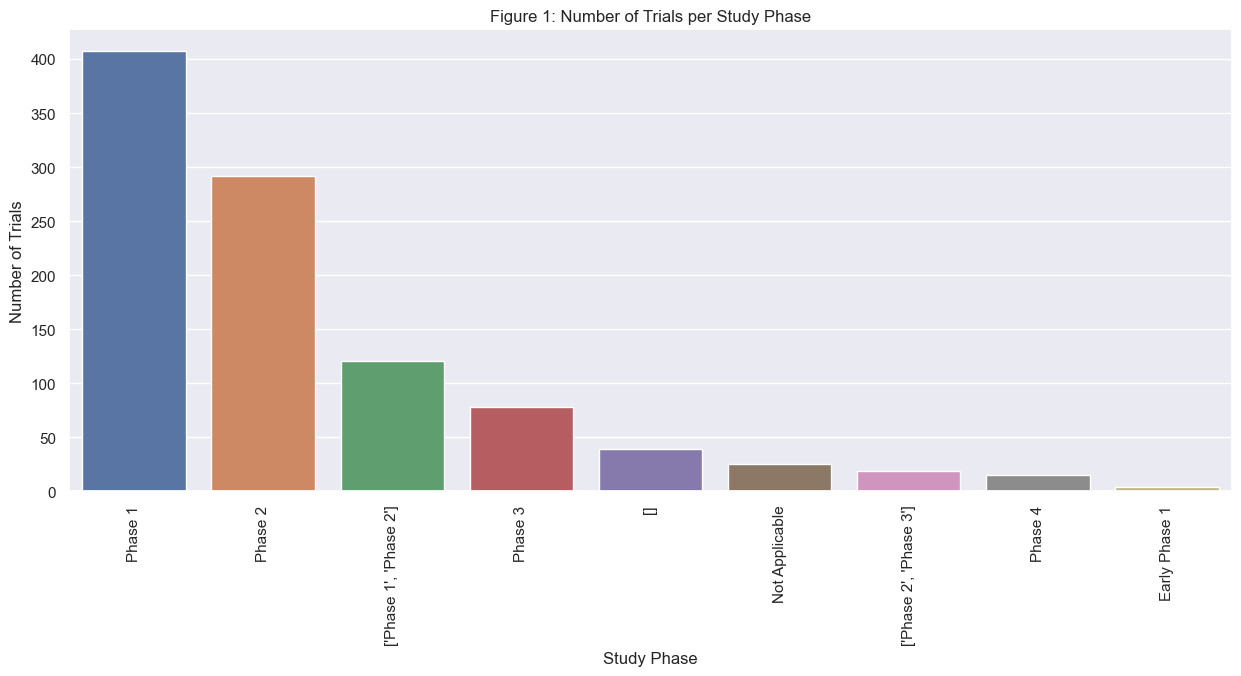

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of trials per study phase
phase_counts = df['Phase'].value_counts()

# Convert index to a list of strings
phase_index = [str(x) for x in phase_counts.index]

# Set the default font size and plot size
sns.set(font_scale=1)
plt.figure(figsize=(15, 6))

# Plot the bar chart
sns.barplot(x=phase_index, y=phase_counts.values)
plt.xlabel('Study Phase')
plt.ylabel('Number of Trials')
plt.title('Figure 1: Number of Trials per Study Phase')
# Rotate the x-axis labels- you can get cute and use < 90 degrees as well
plt.xticks(rotation=90)

# Don't forget this line or nothing will show up
plt.show()


### The next code block can be used to create a bar chart showing the number of trials per lead sponsor. This can help identify which sponsors are running the most trials.



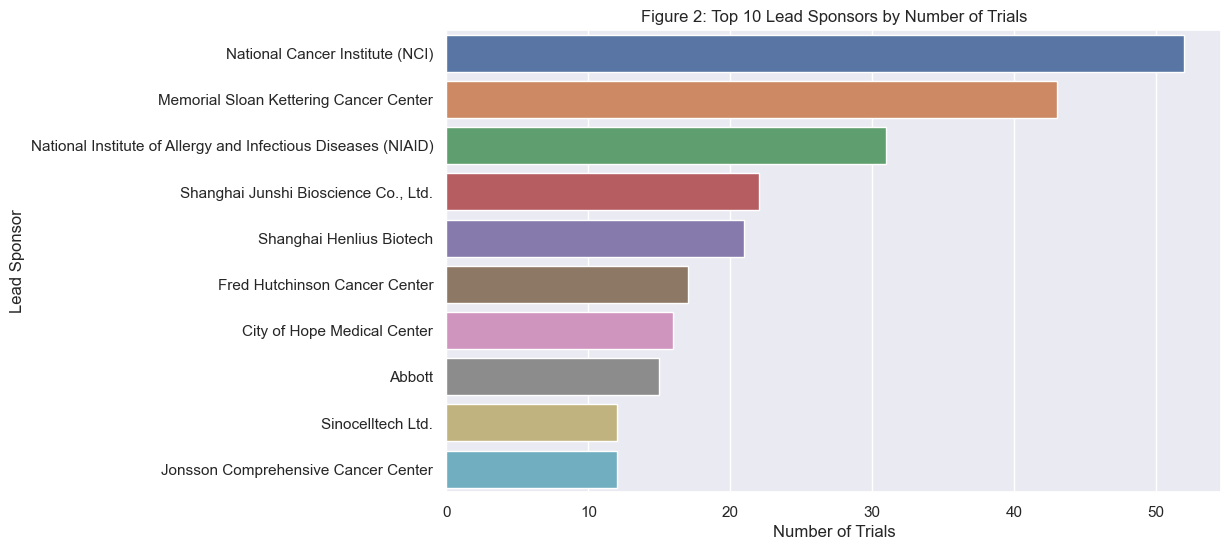

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of trials per lead sponsor
sponsor_counts = df['LeadSponsorName'].value_counts().head(10)

# Convert index to a list of strings
sponsor_index = [str(x) for x in sponsor_counts.index]

# Set the default font size
sns.set(font_scale=1)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sponsor_counts.values, y=sponsor_index)
plt.xlabel('Number of Trials')
plt.ylabel('Lead Sponsor')
plt.title('Figure 2: Top 10 Lead Sponsors by Number of Trials')

plt.show()


### We create a line chart showing the trend of trial start dates over time. This can help highlight crucial patterns or trends in the data that might have gone overlooked.

* It seems that there is an issue with the data in the 'StartDate' column. The error indicates that some values in the column might be lists instead of strings or datetime objects. Let's try to identify and fix these problematic values.

First, let's find out if there are any non-string values in the 'StartDate' column:

In [273]:
non_string_values = df[df['StartDate'].apply(lambda x: not isinstance(x, str))]
print(non_string_values)

     Rank        NCTId                                         BriefTitle  \
27     28  NCT00001105  The Safety and Effectiveness of Human Monoclon...   
86     87  NCT00040586  Phase II Trial of Monoclonal Antibody (J591) i...   
90     91  NCT00043706  Safety, Tolerability, and Pharmacokinetics of ...   
202   203  NCT00000836  A Phase II/III Trial of Human Anti-CMV Monoclo...   
267   268  NCT00002268  A Randomized, Phase I/II Trial to Assess the S...   
276   277  NCT00002016  A Phase I/II Trial to Assess the Safety and To...   
284   285  NCT00650026  Early Access Program of the Safety of Human An...   
375   376  NCT00311545  S0351, CNTO 328 in Treating Patients With Unre...   
426   427  NCT04346277  Compassionate Use Open-Label Anti-CD14 Treatme...   
492   493  NCT00650390  Open Label Study to Assess Efficacy and Safety...   
495   496  NCT00649545  Study of the Human Anti-TNF Monoclonal Antibod...   
531   532  NCT01430429  Primary Biliary Cirrhosis: Investigating A New...   

#### It looks like there are some rows with empty lists [] as the 'StartDate'. We can replace these with None or a specific placeholder value like 'Unknown'. Here's how to replace them with None:

In [274]:
df['StartDate'] = df['StartDate'].apply(lambda x: None if isinstance(x, list) and not x else x)


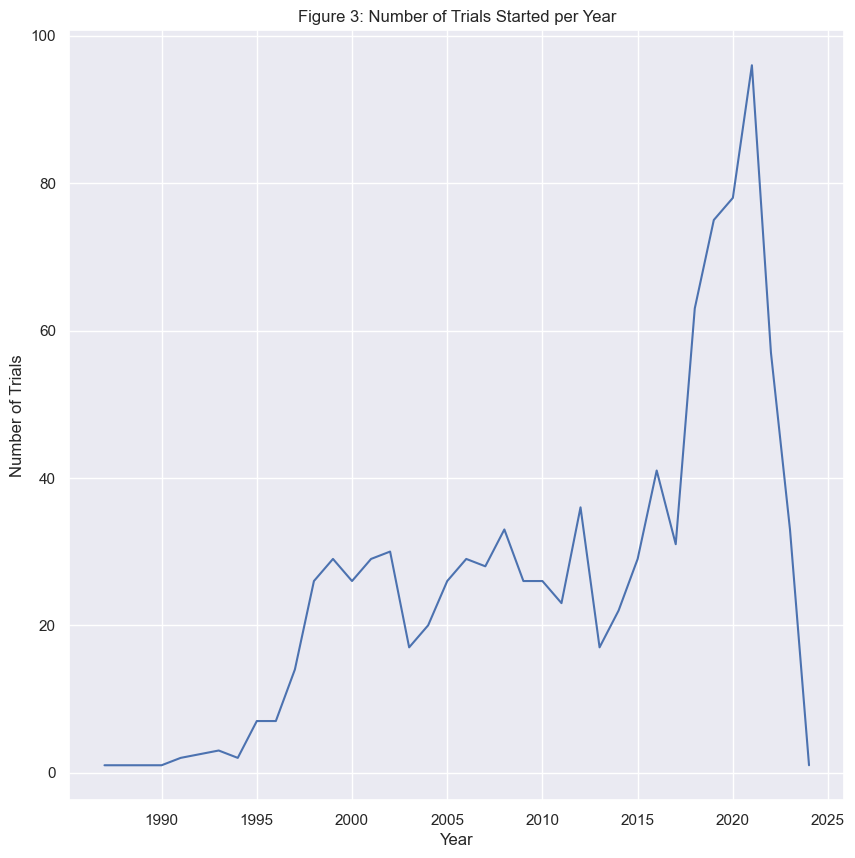

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert StartDate to datetime format
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Create a new DataFrame with yearly counts of trials
trial_start_years = df['StartDate'].dt.year.value_counts().sort_index()

# Set the default font size and plot size
sns.set(font_scale=1)
plt.figure(figsize=(10, 10))

# Plot the line chart
sns.lineplot(x=trial_start_years.index, y=trial_start_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Trials')
plt.title('Figure 3: Number of Trials Started per Year')

plt.show()


### The spike in the number of trials during ~ 2020 - 2022 *could* be related to specific research areas like Covid-19, or it could be that more effective treatments (see Checkpoint Inhibitors) have been sudied, or **Both***. However there are other possibilities b/c of our search terms. So lets consider the following:
<p></p>
<p></p>

* Visualize the number of trials per research area (based on BriefTitle or another relevant column) during the 2019-2020 period.
* Visualize the distribution of intervention types (based on InterventionType column) during the 2019-2020 period.
* Visualize the distribution of study phases (based on Phase column) during the 2019-2020 period.

<p></p>
<p></p>

#### <i>Let's create a visualization of the distribution of intervention types during the 2019-2020 period as an example:</i>

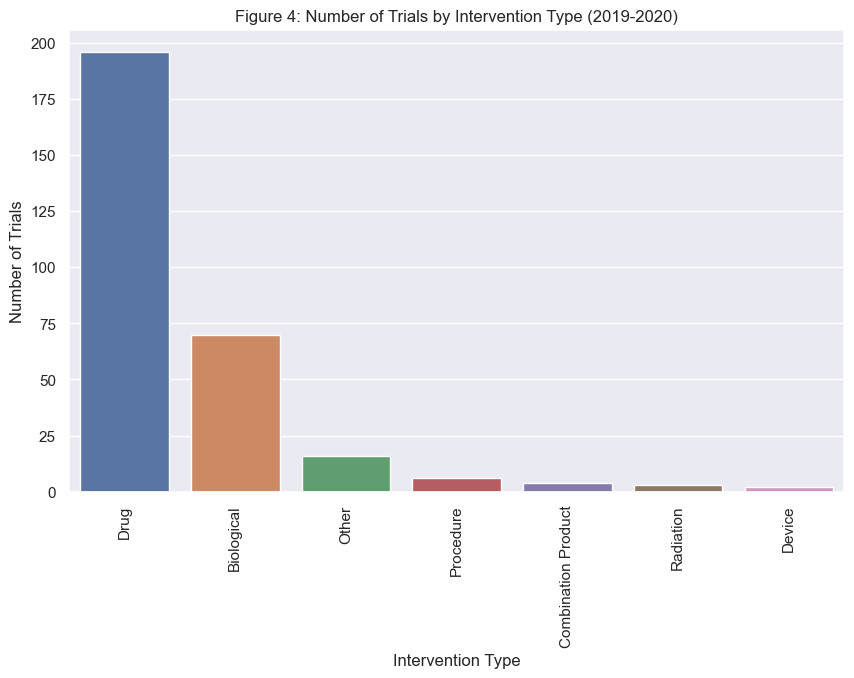

In [276]:
# Filter the DataFrame for trials started between 2019 and 2020
df_2019_2020 = df[(df['StartDate'].dt.year >= 2019)
                  & (df['StartDate'].dt.year <= 2020)]

# Count the occurrences of each intervention type
intervention_counts = df_2019_2020['InterventionType'].explode().value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=intervention_counts.index, y=intervention_counts.values)
plt.xlabel('Intervention Type')
plt.ylabel('Number of Trials')
plt.title('Figure 4: Number of Trials by Intervention Type (2019-2020)')
plt.xticks(rotation=90)
plt.show()

**WOW! Look at the number of drug trials (2019-2020) IS it possible that the high number of drug trials during the 2020 - 2022 period is due to the COVID-19 pandemic? Many trials were initiated for potential treatments, including monoclonal antibodies and other drug types.**

Now, let's perform some descriptive analysis on the DataFrame to get a better understanding of the data. We can calculate summary statistics like the number of unique interventions, the distribution of study phases, and the number of trials per sponsor:

In [277]:
# Number of unique interventions
unique_interventions = df['InterventionType'].explode().nunique()
print(f"Number of unique interventions: {unique_interventions}")

# Distribution of study phases
phase_distribution = df['Phase'].explode().value_counts()
print("\nDistribution of study phases:")
print(phase_distribution)

# Number of trials per sponsor
trials_per_sponsor = df['LeadSponsorName'].value_counts()
print("\nTop 10 sponsors with the most trials:")
print(trials_per_sponsor.head(10))

Number of unique interventions: 10

Distribution of study phases:
Phase 1           528
Phase 2           432
Phase 3            97
Not Applicable     25
Phase 4            15
Early Phase 1       4
Name: Phase, dtype: int64

Top 10 sponsors with the most trials:
National Cancer Institute (NCI)                                  52
Memorial Sloan Kettering Cancer Center                           43
National Institute of Allergy and Infectious Diseases (NIAID)    31
Shanghai Junshi Bioscience Co., Ltd.                             22
Shanghai Henlius Biotech                                         21
Fred Hutchinson Cancer Center                                    17
City of Hope Medical Center                                      16
Abbott                                                           15
Sinocelltech Ltd.                                                12
Jonsson Comprehensive Cancer Center                              12
Name: LeadSponsorName, dtype: int64


Completion rate by intervention type:
There are 178 unique intervention types in the dataset. A few examples include:

* Behavioral: 0% completion rate
* Biological: 54.61% completion rate
* Biological, Biological: 71.15% completion rate
* Radiation: 80% completion rate
* Completion rate by study phase:
* Early Phase 1: 75% completion rate
* Not Applicable: 37.5% completion rate
* Phase 1: 55.77% completion rate
* Phase 1, Phase 2: 47.11% completion rate
* Phase 2: 46.26% completion rate
* Phase 2, Phase 3: 47.37% completion rate
* Phase 3: 57.69% completion rate
* Phase 4: 7.14% completion rate


Completion rate by sponsor:
There are 402 unique lead sponsor names in the dataset. A few examples include:

* 3D Medicines (Sichuan) Co., Ltd.: 100% completion rate
* ANRS, Emerging Infectious Diseases: 0% completion rate
* AVEO Pharmaceuticals, Inc.: 100% completion rate
* Aarhus University Hospital: 100% completion rate
* Zhejiang University: 0% completion rate

Keep in mind that the completion rate depends on the number of trials for each intervention type, study phase, or sponsor, and a small number of trials may not provide a comprehensive understanding of the completion rate. This is just some sample output you might get and I show it for purely educational purposes.







### Using Jupyter Notebooks to Harvest Clinical Data

**What shortcoming are there in using Jupyter Notebooks for harvesting Clinical Data?**

As we have seen here, Jupyter Notebooks are a powerful tool for data analysis, visualization, and interactive computing. However, there are certain shortcomings and limitations when using Jupyter Notebooks for harvesting clinical data:

1. Security: Jupyter Notebooks might not be the most secure environment for handling sensitive clinical data. Unauthorized users can potentially access the data if the notebook is not properly secured. Additionally, Jupyter Notebooks don't have built-in access control, so you would need to implement additional measures to ensure secure access to clinical data.


2. Scalability: Jupyter Notebooks are not designed to handle large-scale data processing tasks. If you need to process vast amounts of clinical data, you may encounter performance issues or limitations in Jupyter Notebooks. In such cases, other tools like Apache Spark or Dask might be more suitable. *You will see us use Apache Spark below to get a more encompassing package of data.*


3. Collaboration: While Jupyter Notebooks enable sharing and collaboration, they might not be the best choice for large teams working on the same dataset. Version control and merging changes in Jupyter Notebooks can be challenging, especially when multiple team members make changes simultaneously.


4. Data cleaning and preprocessing: Jupyter Notebooks are great for exploring and visualizing data but may not be the best option for extensive data cleaning and preprocessing tasks. Clinical data often requires significant cleaning, preprocessing, and transformation before it can be used effectively for analysis. While you can perform these tasks in Jupyter Notebooks, it might be more efficient to use dedicated data transformation tools or ETL (Extract, Transform, Load) pipelines.


5. Real-time data processing: Jupyter Notebooks are not designed for real-time data processing or streaming. If your clinical data harvesting process requires real-time data processing, you might need to consider other tools and platforms that are better suited for such tasks.


6. Integration with external systems: Although Jupyter Notebooks support a wide range of libraries and packages, integrating with external systems or APIs for data harvesting might be more cumbersome compared to dedicated data integration tools.


7. Reproducibility: Jupyter Notebooks can be challenging to reproduce, especially when multiple dependencies or specific library versions are involved. This may make it difficult to share your work with others or use it in a production environment. **Repeoducibility has been a very limitation during the creation of this notebook**


So Jupyter Notebooks are a useful tool for data analysis and exploration, but they have limitations when it comes to security, scalability, collaboration, real-time data processing, and integration with external systems. Depending on your specific needs, you may need to consider alternative tools or platforms for harvesting clinical data.







In [278]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     1000 non-null   int64         
 1   NCTId                    1000 non-null   object        
 2   BriefTitle               1000 non-null   object        
 3   OverallStatus            1000 non-null   object        
 4   StartDate                985 non-null    datetime64[ns]
 5   PrimaryCompletionDate    1000 non-null   object        
 6   StudyType                1000 non-null   object        
 7   Phase                    1000 non-null   object        
 8   EnrollmentCount          1000 non-null   object        
 9   InterventionType         1000 non-null   object        
 10  LeadSponsorName          1000 non-null   object        
 11  PrimaryOutcomeMeasure    1000 non-null   object        
 12  SecondaryOutcomeMeasure  1000 non-n

In [279]:
import requests
import json
import pandas as pd

url = "https://tinyurl.com/yc89mccn"
response = requests.get(url)

response_str = response.content.decode("utf-8")
response_json = json.loads(response_str)

study_fields = response_json["StudyFieldsResponse"]["StudyFields"]

# Convert the study fields to a pandas DataFrame
study_fields_df = pd.DataFrame(study_fields)

# Examine the first few rows of the DataFrame
print(study_fields_df.head())

# Check the DataFrame's information
print(study_fields_df.info())

   Rank          NCTId                                         BriefTitle  \
0     1  [NCT04895566]  [Phase 0/1 Local Application of the Monoclonal...   
1     2  [NCT04895137]  [mFOLFOX6+Bevacizumab+PD-1 Monoclonal Antibody...   
2     3  [NCT05557903]  [Phase Ⅰ Clinical Study of Anti-CD52 Monoclona...   
3     4  [NCT05039580]  [Programmed Cell Death Protein-1 (PD-1) Monocl...   
4     5  [NCT04198623]  [Efficacy of Montelukast in Reducing the Incid...   

  OverallStatus            StartDate PrimaryCompletionDate         StudyType  \
0   [Completed]       [May 24, 2021]      [March 10, 2023]  [Interventional]   
1  [Recruiting]        [May 1, 2021]         [May 1, 2022]  [Interventional]   
2  [Recruiting]  [December 20, 2021]   [December 30, 2022]  [Interventional]   
3  [Recruiting]       [May 15, 2021]      [April 30, 2023]  [Interventional]   
4  [Recruiting]     [March 20, 2020]  [September 20, 2023]  [Interventional]   

             Phase EnrollmentCount InterventionType  \
0

In [280]:
def clean_cell_values(df):
    for column in df.columns:
        df[column] = df[column].apply(
            lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)
    return df


cleaned_df = clean_cell_values(study_fields_df)

print(cleaned_df.head())
print(cleaned_df.info())

   Rank        NCTId                                         BriefTitle  \
0     1  NCT04895566  Phase 0/1 Local Application of the Monoclonal ...   
1     2  NCT04895137  mFOLFOX6+Bevacizumab+PD-1 Monoclonal Antibody ...   
2     3  NCT05557903  Phase Ⅰ Clinical Study of Anti-CD52 Monoclonal...   
3     4  NCT05039580  Programmed Cell Death Protein-1 (PD-1) Monoclo...   
4     5  NCT04198623  Efficacy of Montelukast in Reducing the Incide...   

  OverallStatus          StartDate PrimaryCompletionDate       StudyType  \
0     Completed       May 24, 2021        March 10, 2023  Interventional   
1    Recruiting        May 1, 2021           May 1, 2022  Interventional   
2    Recruiting  December 20, 2021     December 30, 2022  Interventional   
3    Recruiting       May 15, 2021        April 30, 2023  Interventional   
4    Recruiting     March 20, 2020    September 20, 2023  Interventional   

           Phase EnrollmentCount InterventionType  \
0  Early Phase 1              10       

In [281]:
# Ensure the 'InterventionType' column contains strings instead of lists
cleaned_df['InterventionType'] = cleaned_df['InterventionType'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x)

# Group by 'InterventionType' and count occurrences
intervention_counts = cleaned_df.groupby(
    'InterventionType').size().reset_index(name='Count')

# Sort the resulting DataFrame by 'Count' in descending order
intervention_counts = intervention_counts.sort_values(by='Count',
                                                      ascending=False)

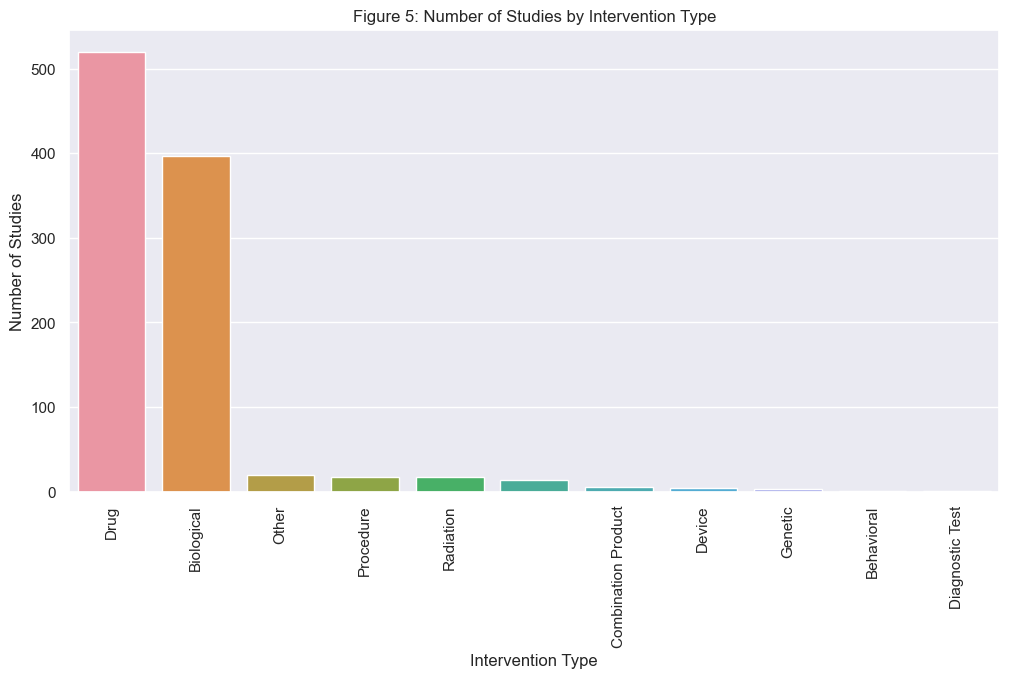

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'InterventionType' column contains strings instead of lists
cleaned_df['InterventionType'] = cleaned_df['InterventionType'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x)

# Group by 'InterventionType' and count occurrences
intervention_counts = cleaned_df.groupby(
    'InterventionType').size().reset_index(name='Count')

# Sort the resulting DataFrame by 'Count' in descending order
intervention_counts = intervention_counts.sort_values(by='Count',
                                                      ascending=False)

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='InterventionType', y='Count', data=intervention_counts)

# Update x-axis labels
labels = [label.get_text().replace(",", "") for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=90)

plt.ylabel('Number of Studies')
plt.xlabel('Intervention Type')
plt.title('Figure 5: Number of Studies by Intervention Type')
plt.show()

**This small field: 'Combination Product'- maybe we can look at this slightly more**

In [283]:
# Filter the DataFrame to only include rows with 'Combination Product' as the InterventionType
combination_product_df = cleaned_df[cleaned_df['InterventionType'] ==
                                    'Combination Product']

# Examine the first few rows of the combination product DataFrame
print(combination_product_df.head())

# Check the combination product DataFrame's information
print(combination_product_df.info())

     Rank        NCTId                                         BriefTitle  \
30     31  NCT04441918  Tolerability,Safety,Pharmacokinetic Profile an...   
157   158  NCT04911517  Neoadjuvant Chemoradiotherapy Plus Tislelizuma...   
231   232  NCT05368051  Multi-omics Model Predicts Efficacy of Preoper...   
322   323  NCT04273100  PD-1 Monoclonal Antibody, Lenvatinib and TACE ...   
346   347  NCT04518852  TACE, Sorafenib and PD-1 Monoclonal Antibody i...   

      OverallStatus           StartDate PrimaryCompletionDate       StudyType  \
30   Unknown status        June 5, 2020     December 11, 2020  Interventional   
157      Recruiting        June 1, 2021         December 2022  Interventional   
231      Recruiting     October 1, 2021      October 31, 2022   Observational   
322  Unknown status   November 14, 2019     December 31, 2020  Interventional   
346  Unknown status  September 14, 2020         July 31, 2022  Interventional   

       Phase EnrollmentCount     InterventionType 

**In this query, we seem to have combination therapies, or 'Combination Product'. I am interested in these 'Combination Product' types. I was wondering if we could'nt look any deeper into these**

**While these poly-therapies don't seem to occupy a large part of the landscape in this particular query, I suspect that they make a larger contribution than is being represented here and they are shown below**

However, in doing so I had to resurrect some old code that uses a measure called `SuccessRate`, This measure should be taken to mean `CompletedTrials` so as not to mislead the reader.

**In cancer studies, I would expect a combination of approaches to be the most effective, however, in the query, they seem to be underrepresented: below you can see what combination therapies are being employed in this query: I suspect we will have to make a deeper dive into these types of therapies in a future notebook**

**Now let us see how many completed trials represent each Mono-therapy**

**focus on the number of completed trials per LeadSponsorName instead of success rates. We will filter sponsors with at least 10 completed trials and create a Seaborn bar plot displaying the number of completed trials for each sponsor.**

*Have you been reading the code- This codeform comes up again and again- awhat is this doing?
`completed_trials_df = cleaned_df[cleaned_df['OverallStatus'] == 'Completed']`

This line of code creates a new DataFrame that includes only the rows from the original `cleaned_df` DataFrame where the 'OverallStatus' column has the value 'Completed'. The syntax `cleaned_df[...]` is a way of filtering a DataFrame by specifying a condition inside the square brackets. The condition `cleaned_df['OverallStatus'] == 'Completed'` checks if each element in the 'OverallStatus' column is equal to the string 'Completed' and returns a boolean Series. This boolean Series is then used to filter the rows of the `cleaned_df` DataFrame, returning a new DataFrame containing only the rows where the corresponding value in the boolean Series is True.


#### Let's make some toy models. We must note that we know ahead of time that there is a great imbalance between trials that have been completedvs. not completed- and remember our first hedge:

> Bias: ClinicalTrials.gov relies on trial sponsors to submit their data, and there may be a bias towards trials that are more likely to produce positive results. This can make it difficult to get an accurate picture of the efficacy of a particular treatment.

However, when making models- it is important to state your assumptions and point out potentisl weaknesses. These models don't hold much meaning in the present context, but we will make more robust models in our future notebooks. Let us perform these models, now that the appropriate caveats are in place, and struggle with them. This serves our  educational goals, and introduces some illustrative models.




**We will now make another API call to ClinicalTrials.gov API to get some more information such that we can perform 1) a Regression Model and 2)A Classification Model


In [284]:
import requests
import json
import pandas as pd

# Define the base URL for the ClinicalTrials.gov API
base_url = "https://clinicaltrials.gov/api/query/study_fields?"

# Define the search parameters
search_params = {
    "expr": "monoclonal+antibodies+AND+solid+tumors+AND+phase+2+OR+phase+3",
    "fields":
    "NCTId,BriefTitle,StartDate,PrimaryCompletionDate,LeadSponsorName,Phase,EnrollmentCount,InterventionType",
    "min_rnk": 1,
    "max_rnk": 1000,
    "fmt": "JSON",
}

# Send the GET request to the API
response = requests.get(base_url, params=search_params)

# Check if the request is successful
if response.status_code == 200:
    # Parse the response JSON
    response_json = response.json()

    # Access the "StudyFields" key in the JSON object
    study_fields = response_json["StudyFieldsResponse"]["StudyFields"]

    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(study_fields)

    # Convert list values to single values
    df = df.applymap(lambda x: x[0]
                     if isinstance(x, list) and len(x) == 1 else x)

    # Convert any remaining lists in the "Phase" and "InterventionType" columns to strings
    df["Phase"] = df["Phase"].apply(lambda x: ', '.join(x)
                                    if isinstance(x, list) else x)
    df["InterventionType"] = df["InterventionType"].apply(
        lambda x: ', '.join(x) if isinstance(x, list) else x)

    # Convert dates to datetime objects
    df["StartDate"] = pd.to_datetime(df["StartDate"], errors="coerce")
    df["PrimaryCompletionDate"] = pd.to_datetime(df["PrimaryCompletionDate"],
                                                 errors="coerce")

    # Filter out studies outside of 2015-2020
    df = df.loc[df["StartDate"].dt.year.between(2015, 2020)
                & df["PrimaryCompletionDate"].dt.year.between(2015, 2020)]

    # Filter out Phase 1 studies
    df = df.loc[df["Phase"] != "Phase 1"]

    # Save the DataFrame to a parquet file
    df.to_parquet(
        "Desktop/monoclonal_antibodies_solid_tumors_filtered.parquet",
        index=False)

    # Display the first few rows of the DataFrame
    print(df.head())

else:
    print("Failed to fetch data from the API")

    Rank        NCTId                                         BriefTitle  \
50    51  NCT02805660  Phase 1/2 Study of Mocetinostat and Durvalumab...   
68    69  NCT03379259  Study of BGB-A333 Alone and in Combination Wit...   
77    78  NCT02438722  S1403, Afatinib Dimaleate With or Without Cetu...   
84    85  NCT03704246  Recombinant Human Anti-PD-1 Monoclonal Antibod...   
91    92  NCT02915432  The Study to Evaluate Toripalimab (JS001) in P...   

    StartDate PrimaryCompletionDate                       LeadSponsorName  \
50 2016-06-01            2019-12-14              Mirati Therapeutics Inc.   
68 2017-11-27            2020-09-08                               BeiGene   
77 2015-05-07            2018-09-25          SWOG Cancer Research Network   
84 2018-09-30            2019-12-30   Taizhou Hanzhong biomedical co. LTD   
91 2016-12-01            2020-02-19  Shanghai Junshi Bioscience Co., Ltd.   

               Phase EnrollmentCount                    InterventionType  
50  P

In [285]:
# Save the DataFrame to a CSV file
df.to_csv("Desktop/monoclonal_antibodies_solid_tumors_filtered.csv",
          index=False)

# Read the CSV file
df_csv = pd.read_csv("Desktop/monoclonal_antibodies_solid_tumors_filtered.csv")

# Display the first few rows of the DataFrame
print(df_csv.head())

# Save the DataFrame to a Parquet file
df_csv.to_parquet(
    "Desktop/monoclonal_antibodies_solid_tumors_filtered_from_csv.parquet",
    index=False)

# Read the Parquet file into a DataFrame
df_from_parquet = pd.read_parquet(
    "Desktop/monoclonal_antibodies_solid_tumors_filtered_from_csv.parquet")

# Display the first few rows of the DataFrame
print(df_from_parquet.head())

   Rank        NCTId                                         BriefTitle  \
0    51  NCT02805660  Phase 1/2 Study of Mocetinostat and Durvalumab...   
1    69  NCT03379259  Study of BGB-A333 Alone and in Combination Wit...   
2    78  NCT02438722  S1403, Afatinib Dimaleate With or Without Cetu...   
3    85  NCT03704246  Recombinant Human Anti-PD-1 Monoclonal Antibod...   
4    92  NCT02915432  The Study to Evaluate Toripalimab (JS001) in P...   

    StartDate PrimaryCompletionDate                       LeadSponsorName  \
0  2016-06-01            2019-12-14              Mirati Therapeutics Inc.   
1  2017-11-27            2020-09-08                               BeiGene   
2  2015-05-07            2018-09-25          SWOG Cancer Research Network   
3  2018-09-30            2019-12-30   Taizhou Hanzhong biomedical co. LTD   
4  2016-12-01            2020-02-19  Shanghai Junshi Bioscience Co., Ltd.   

              Phase  EnrollmentCount                    InterventionType  
0  Phase 1,

In [286]:
print(df.columns)

Index(['Rank', 'NCTId', 'BriefTitle', 'StartDate', 'PrimaryCompletionDate',
       'LeadSponsorName', 'Phase', 'EnrollmentCount', 'InterventionType'],
      dtype='object')


**Here's a simple demonstration of a linear regression using the data we have obtained. In this example, we will predict the EnrollmentCount based on the number of days between the StartDate and PrimaryCompletionDate. This is just an example for educational purposes, and the actual relationship between these variables might not be strong.**

First, we need to calculate the number of days between the `StartDate` and `PrimaryCompletionDate` and add a new column to the `DataFrame`. We will use the scikit-learn, which is a popular machine learning library in Python.

This code reads the Parquet file into a `DataFrame`, calculates the number of days between `StartDate` and `PrimaryCompletionDate`, and adds a new column `DurationDays`. It then defines the feature (X) and target (y) variables, splits the data into training and testing sets, creates a linear regression model, trains the model, and predicts the target variable for the test data. Finally, it calculates the mean squared error and R2 score and plots the true values and predictions.

Please keep in mind that this example is for educational purposes and may not have a strong predictive relationship between the chosen variables. In a real-world scenario, you would need to perform feature engineering and selection to find the most relevant features for your prediction task.



Mean squared error: 61405.96
R2 score: -0.06


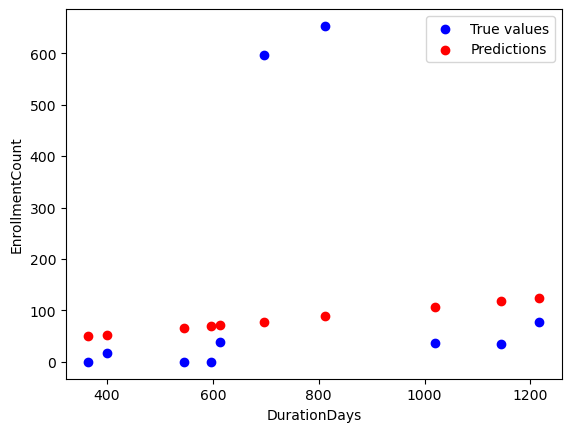

In [311]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the Parquet file into a DataFrame
df = pd.read_parquet(
    "Desktop/monoclonal_antibodies_solid_tumors_filtered_from_csv.parquet")

# Convert 'StartDate' and 'PrimaryCompletionDate' columns to datetime objects
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['PrimaryCompletionDate'] = pd.to_datetime(df['PrimaryCompletionDate'])

# Calculate the number of days between StartDate and PrimaryCompletionDate
df['DurationDays'] = (df['PrimaryCompletionDate'] - df['StartDate']).dt.days

# Drop rows with missing values
df = df.dropna(subset=['DurationDays', 'EnrollmentCount'])

# Define the feature (X) and target (y) variables
X = df[['DurationDays']]
y = df['EnrollmentCount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate and display the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

# Plot the true values and predictions
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('DurationDays')
plt.ylabel('EnrollmentCount')
plt.legend()
plt.show()

**Actually if you look at the graph- the predicted values and the true values are closely aligned, there are only two 'True' values that have y-values 600+ the rest of the values are closely aligned. The model performs better than expected; do we rerun the model and take out those 'outliers'? These outliers are likely influencing the mean squared error and R2 score significantly.**

How do we do this? Do we just take out points that that seem like obvious outliers?? You could, and I've seen it done in a number of professional settings. However, we will attempt to be more systematic in our methods here, particularly for eduational purposes.

To remove the outliers, you can use a criterion based on a multiple of the interquartile range (IQR) or standard deviation, or you can choose to remove data points above a certain threshold based on domain knowledge. After removing the outliers, re-fit the linear regression model and calculate the new mean squared error and R2 score. This should provide a better assessment of the model's performance for the majority of the data points. However, as we said before, removing outliers may not always be the best solution, as they may contain important information about the dataset.

The method of the multiple of the interquartile range (IQR) is a common technique for detecting and handling outliers in a dataset. The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. The IQR represents the middle 50% of the data, and it is a measure of the data's spread.

To detect outliers using the IQR method, we calculate the lower and upper bounds by a multiple of the IQR. A common choice for this multiple is 1.5, but you can choose a different value depending on the desired level of sensitivity to outliers. Here's how to calculate the lower and upper bounds:

1. Compute the first quartile (Q1) and the third quartile (Q3).
2. Calculate the IQR: IQR = Q3 - Q1.
3. Choose a multiple, often denoted as k (commonly k=1.5).
4. Calculate the lower bound: LowerBound = Q1 - k * IQR.
5. Calculate the upper bound: UpperBound = Q3 + k * IQR.


**Outlier Detection Using Interquartile Range (IQR) Method**

Lower Bound:
$$
\text{LowerBound} = Q_1 - k \times \text{IQR}
$$

Upper Bound:
$$
\text{UpperBound} = Q_3 + k \times \text{IQR}
$$

Where:
- $Q_1$ is the first quartile (25th percentile)
- $Q_3$ is the third quartile (75th percentile)
- $k$ is the chosen multiple, often 1.5
- IQR is the interquartile range, calculated as $Q_3 - Q_1$

**Outliers are considered any data points below the Lower Bound or above the Upper Bound.**


Mean squared error: 1107.79
R2 score: 0.28


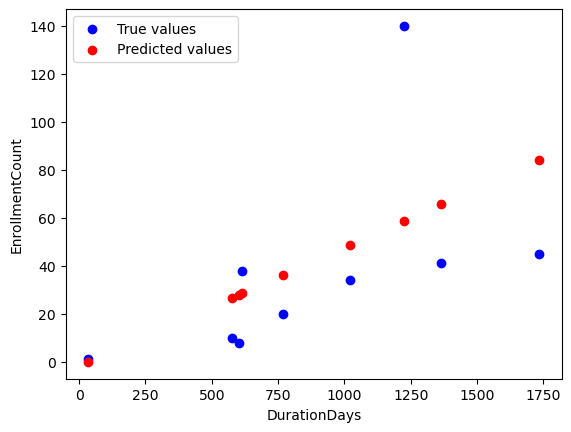

In [312]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Remove outliers based on 1.5 times the IQR
Q1 = df['EnrollmentCount'].quantile(0.25)
Q3 = df['EnrollmentCount'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
df_no_outliers = df[df['EnrollmentCount'] <= outlier_threshold]

# Define the features and target variable
X = df_no_outliers[['DurationDays']]
y = df_no_outliers['EnrollmentCount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Train the linear regression model
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train, y_train)

# Make predictions
y_pred = model_no_outliers.predict(X_test)

# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R2 score: {:.2f}".format(r2))

# Plot the true vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('DurationDays')
plt.ylabel('EnrollmentCount')
plt.legend()
plt.show()

The mean squared error has significantly decreased from 61405.96 to 1107.79, indicating that the model's predictions are closer to the true values. Moreover, the R2 score has improved from -0.06 to 0.28, which means that the model explains 28% of the variation in the data. While this R2 score might not be very high, it is a considerable improvement compared to the previous model that included the outliers.

It's important to note that removing outliers can sometimes improve the performance of a linear regression model, as it reduces the impact of extreme values on the model's predictions. However, again, one should be cautious when removing outliers, as it could also result in the loss of important information or introduce bias into the model. It is essential to carefully assess the reasons for the presence of outliers and consider the impact of their removal on the model's performance and interpretation.



**Even though we have made a toy model for the purposes of demonstration, keep in mind that such a model *could* have some use in the real world:

The linear regression model we built has limited use in its current form, especially considering the low R-squared score. However, it still provides some insights that could be valuable for clinicians or the pharmaceutical industry. Here are a few ways the model could be helpful:

1. Identifying trends: By analyzing the relationship between the duration of a study and the number of enrolled patients, the model can help identify general trends, such as whether longer studies tend to have more or fewer participants. This information can be useful when planning future studies and estimating the required resources.

2. Preliminary estimation: Although the model is not very accurate, it can still provide a rough estimation of the number of enrolled patients given the study duration. This could be helpful in the early stages of study design or for providing a quick estimate when more sophisticated models are not available.

3. Data exploration: The model can be used as a starting point for further data exploration and analysis. It can help identify potential outliers or unusual cases, which can then be further investigated. This could lead to the discovery of new insights or the identification of data quality issues.

To make the model more useful for clinicians and the pharmaceutical industry, further improvements can be made by:

1. Incorporating additional relevant features: Adding more variables, such as the type of cancer, intervention, study phase, or sponsor, could help improve the model's accuracy and provide more targeted insights.

2. Using more advanced modeling techniques: Linear regression is a simple method, and more sophisticated techniques such as multiple regression, decision trees, or neural networks might provide better predictions.

3. Collecting more data: Obtaining a larger dataset or incorporating data from additional sources could help improve the model's performance and provide more reliable insights.

Ultimately, the model in its current form may not have a significant impact on clinical practice or industry decision-making. However, it can serve as a starting point for further analysis and model development, which could lead to more useful predictions and insights.


### Polytherapies

Polytherapies have to be a staple of cancer treatment. it seems unlikely to me that a single therapy would work better than a combination of therapies. Below we see the top 10 polytherapeutic strategies with respect to enrollment number. However as our figure above indicates, Drug and Biological therapies are the most considered treatments at the moment.

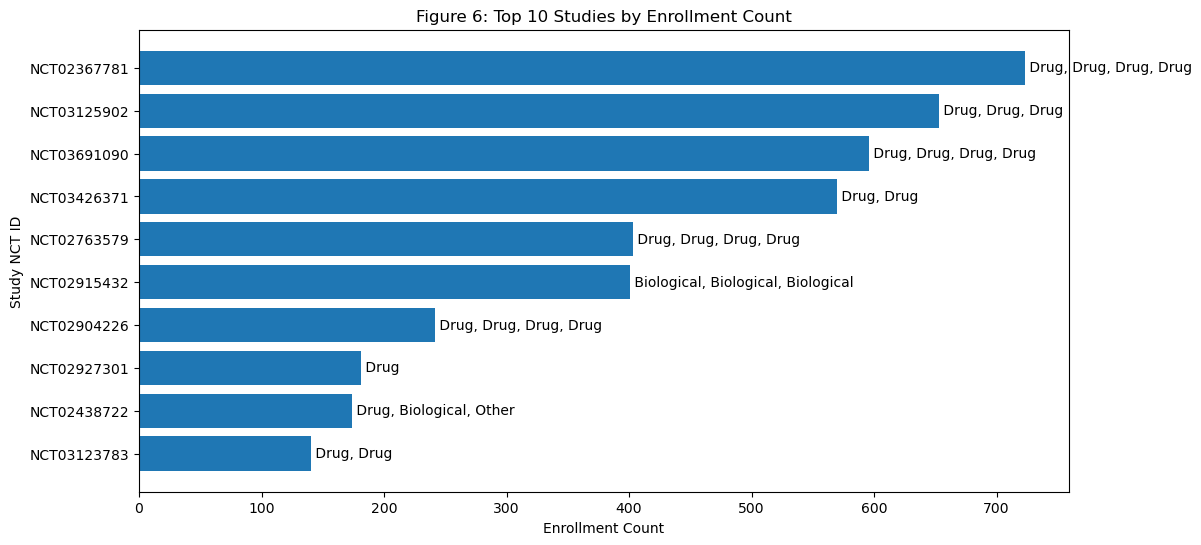

In [313]:
import matplotlib.pyplot as plt

# Sort the DataFrame by enrollment count in descending order
df_sorted = df.sort_values(by="EnrollmentCount", ascending=False)

# Select the top 10 studies with the highest enrollment count
top_10_studies = df_sorted.head(10)

# Create a horizontal bar plot for the top 10 studies
plt.figure(figsize=(12, 6))
plt.barh(top_10_studies["NCTId"],
         top_10_studies["EnrollmentCount"],
         align='center')
plt.xlabel("Enrollment Count")
plt.ylabel("Study NCT ID")
plt.title("Figure 6: Top 10 Studies by Enrollment Count")

# Add intervention type labels to the bars
for index, row in top_10_studies.iterrows():
    plt.text(row["EnrollmentCount"],
             row["NCTId"],
             f" {row['InterventionType']}",
             va='center')

plt.gca().invert_yaxis()  # Reverse the order to show the highest count on top
plt.show()

### Monotherapies

Here are the top monotherapies by enrollment number

In [314]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


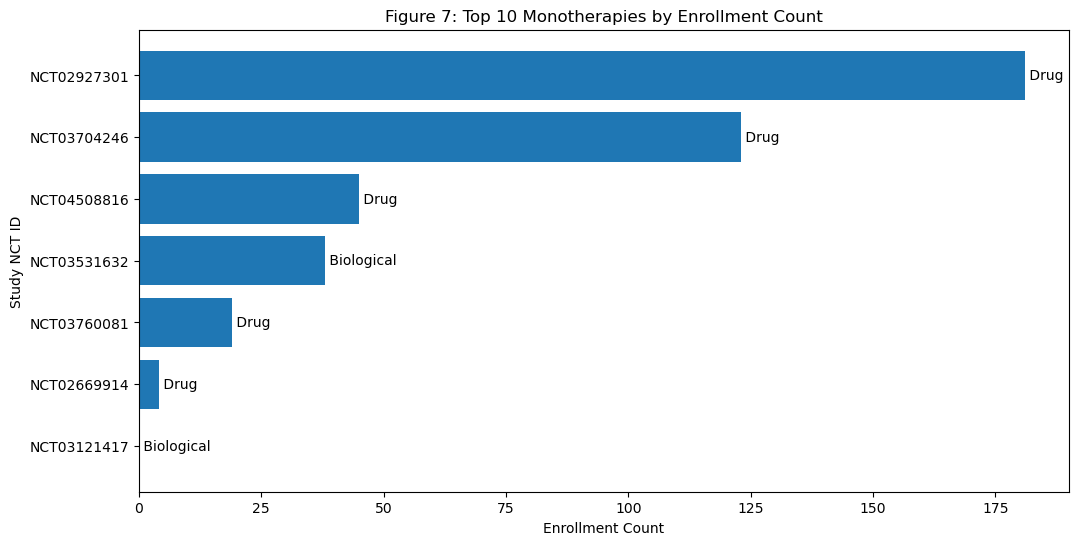

In [315]:
# Filter the DataFrame to only include monotherapies
monotherapies = df[df["InterventionType"].str.count(",") == 0]

# Sort the monotherapies by enrollment count in descending order
monotherapies_sorted = monotherapies.sort_values(by="EnrollmentCount",
                                                 ascending=False)

# Select the top 10 monotherapies with the highest enrollment count
top_10_monotherapies = monotherapies_sorted.head(10)

# Create a horizontal bar plot for the top 10 monotherapies
plt.figure(figsize=(12, 6))
plt.barh(top_10_monotherapies["NCTId"],
         top_10_monotherapies["EnrollmentCount"],
         align='center')
plt.xlabel("Enrollment Count")
plt.ylabel("Study NCT ID")
plt.title("Figure 7: Top 10 Monotherapies by Enrollment Count")

# Add intervention type labels to the bars
for index, row in top_10_monotherapies.iterrows():
    plt.text(row["EnrollmentCount"],
             row["NCTId"],
             f" {row['InterventionType']}",
             va='center')

plt.gca().invert_yaxis()  # Reverse the order to show the highest count on top
plt.show()

In [316]:
import matplotlib.pyplot as plt

# Filter the DataFrame to only include studies that started between 2015 and 2020
studies_2015_2020 = df[(df["StartDate"] >= "2015-01-01")
                       & (df["StartDate"] <= "2020-12-31")]

# Sort the studies by enrollment count in descending order and select the top 10
top_10_studies = studies_2015_2020.sort_values(by="EnrollmentCount",
                                               ascending=False).head(10)

# Set the figure size and font size
plt.figure(figsize=(60, 90))
plt.rcParams.update({'font.size': 35})

# Create a horizontal bar plot for the top 10 studies
plt.barh(top_10_studies["NCTId"],
         top_10_studies["EnrollmentCount"],
         align='center')
plt.xlabel("Enrollment Count")
plt.ylabel("Study NCT ID")
plt.title("Figure 8: Top 10 Monoclonal Antibody Studies by Enrollment Count (2015-2020)")

# Add brief titles to the bars with larger labels
for index, row in top_10_studies.iterrows():
    plt.text(row["EnrollmentCount"],
             row["NCTId"],
             f" {row['BriefTitle']}",
             va='center', fontsize=80)

plt.gca().invert_yaxis()  # Reverse the order to show the highest count on top

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Set the font size and alignment of the y-axis tick labels
plt.yticks(fontsize=30, ha='left')

plt.show()


There is a line of code below that looks like this: `pattern = r'\b\w+[a-zA-Z]-\w+\b'` This is called a 'regular expression'. This line of code defines a regular expression pattern that matches words containing a hyphen (-) between two alphabetic characters.

Here's a breakdown of the pattern:

* r at the beginning of the pattern stands for "raw", which means that backslashes () won't be treated as escape characters.

* \b matches a word boundary, which is a zero-width position between a word character (as defined by \w) and a non-word character.

* \w+ matches one or more word characters (letters, digits, or underscores).

* [a-zA-Z] matches a single alphabetic character (either upper or lowercase).

* - matches the hyphen character.

* \w+ matches one or more word characters.

* \b matches another word boundary.

So, the overall pattern matches a sequence of one or more word characters, followed by an alphabetic character, a hyphen, and then one or more word characters again, with word boundaries on either side.

For example, this pattern would match the following words: "self-aware", "mother-in-law", "co-founder", "pre-school", etc. As you'll see, it doesn't work 100% because I just wanted antibodiess on the x-axis.

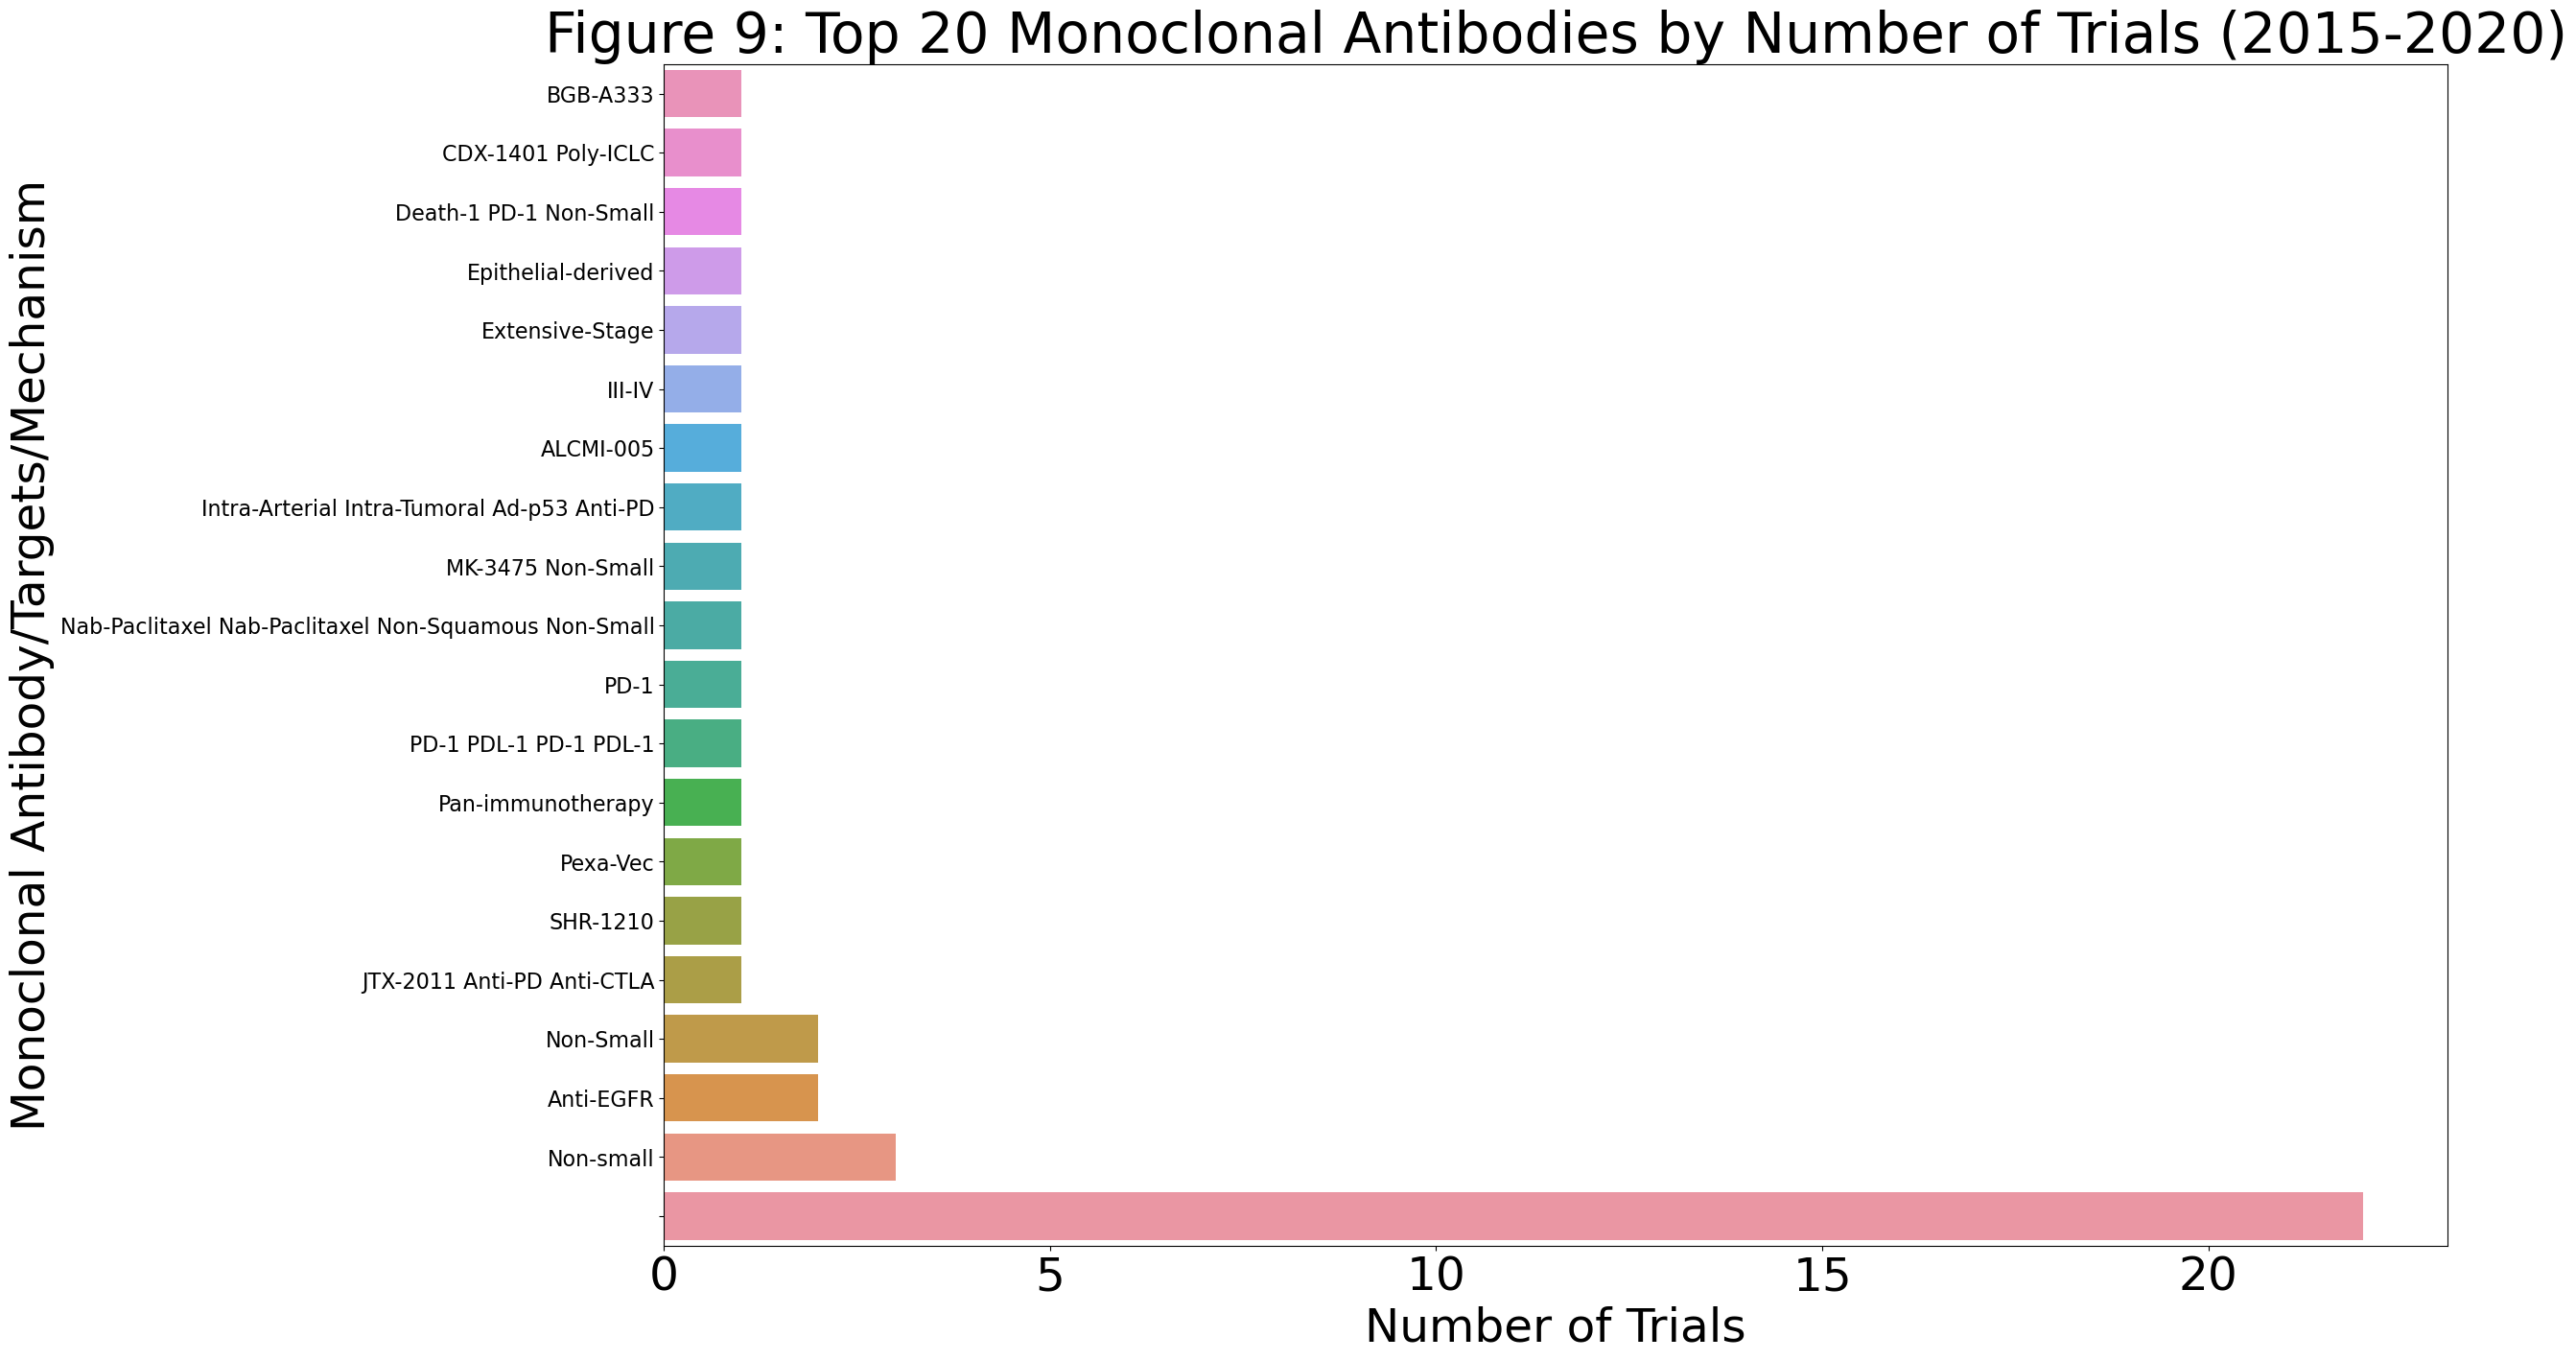

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Read the parquet file into a DataFrame
file_path = "Desktop/monoclonal_antibodies_solid_tumors_filtered_from_csv.parquet"
df = pd.read_parquet(file_path)

# Convert the dates in the "StartDate" column to datetime objects
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Filter the dataset to include trials between 2015 and 2020
start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2020-12-31")
filtered_df = df[(df['StartDate'] >= start_date) & (df['StartDate'] <= end_date)]

# Define a simple pattern to extract monoclonal antibody names from the 'BriefTitle' column as a regular expression
pattern = r'\b\w+[a-zA-Z]-\w+\b'

# Extract monoclonal antibody names
filtered_df['Monoclonal Antibody'] = filtered_df['BriefTitle'].apply(lambda x: ' '.join(re.findall(pattern, x)))

# Group the data by the monoclonal antibody and count the number of trials
grouped_df = filtered_df.groupby('Monoclonal Antibody').size().reset_index(name='Number of Trials')

# Sort the data by the number of trials and select the top 20
top20_mabs = grouped_df.sort_values(by='Number of Trials', ascending=False).head(20)

# Set the figure size
plt.figure(figsize=(24, 16))

# Create a horizontal bar plot for the top 20 monoclonal antibodies using Seaborn
ax = sns.barplot(x='Number of Trials',
                 y='Monoclonal Antibody',
                 data=top20_mabs,
                 orient='h')

plt.xlabel("Number of Trials")
plt.ylabel("Monoclonal Antibody/Targets/Mechanism")
plt.title("Figure 9: Top 20 Monoclonal Antibodies by Number of Trials (2015-2020)")

plt.gca().invert_yaxis()  # Reverse the order to show the highest count on top

# Set the font size for y-axis labels
ax.tick_params(axis='y', labelsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)

plt.show()


### Using sqlite3

**Did you know python has its own sql language?**

sqlite3 is a built-in library in Python that provides a lightweight disk-based database that doesn't require a separate server process and allows accessing the database using SQL commands. It's a great tool for small to medium-sized projects or for prototyping.

In a Jupyter notebook, sqlite3 can be used to create a database and tables, insert and retrieve data, and perform various operations on the data using SQL commands. This makes it easy to store and manipulate data within the notebook environment, without the need for an external database server.

For example, in this project, sqlite3 was used to load the dataset into a database and perform some initial data exploration and analysis. It was also used to store the preprocessed dataset for use in building and evaluating the machine learning models.

Overall, sqlite3 can be a useful tool for working with data in Jupyter notebooks, especially for smaller projects where a full-fledged database server may not be necessary. Here we just provide an examplke of using this feature to search a .csv file (essentially a small database)

In [318]:
import pandas as pd
import sqlite3

# Read the .csv file into a pandas DataFrame
csv_file_path = "monoclonal_antibodies_solid_tumors_filtered.csv"
df = pd.read_csv(csv_file_path)

# Connect to an SQLite database (this will create a new file called 'monoclonal_antibodies.db')
conn = sqlite3.connect("monoclonal_antibodies.db")

# Write the DataFrame to the SQLite database as a new table called 'monoclonal_antibodies'
df.to_sql("monoclonal_antibodies", conn, if_exists="replace", index=False)

# Close the SQLite connection
conn.close()


In [319]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("monoclonal_antibodies.db")

# Define the SQLite query for all solid tumors
query = """
SELECT *
FROM monoclonal_antibodies
WHERE BriefTitle LIKE '%solid tumor%'
   OR BriefTitle LIKE '%solid tumour%'
"""

# Execute the query and store the results in a pandas DataFrame
results_df = pd.read_sql_query(query, conn)

# Close the SQLite connection
conn.close()

# Truncate the 'BriefTitle' column to display only the first 50 characters
results_df['BriefTitle'] = results_df['BriefTitle'].str.slice(0, 50)

# Display the results as a pandas DataFrame
display(results_df)


,Rank,NCTId,BriefTitle,StartDate,PrimaryCompletionDate,LeadSponsorName,Phase,EnrollmentCount,InterventionType
0,51,NCT02805660,Phase 1/2 Study of Mocetinostat and Durvalumab...,2016-06-01,2019-12-14,Mirati Therapeutics Inc.,"['Phase 1', 'Phase 2']",83,"['Drug', 'Drug', 'Drug', 'Drug', 'Drug']"
1,69,NCT03379259,Study of BGB-A333 Alone and in Combination Wit...,2017-11-27,2020-09-08,BeiGene,"['Phase 1', 'Phase 2']",39,"['Drug', 'Drug']"
2,85,NCT03704246,Recombinant Human Anti-PD-1 Monoclonal Antibod...,2018-09-30,2019-12-30,Taizhou Hanzhong biomedical co. LTD,Phase 2,123,Drug
3,108,NCT02904226,JTX-2011 Alone and in Combination With Anti-PD...,2016-08-01,2020-07-01,"Jounce Therapeutics, Inc.","['Phase 1', 'Phase 2']",242,"['Drug', 'Drug', 'Drug', 'Drug']"
4,137,NCT02963610,Phase I/II Study of Lenalidomide Plus Pembroli...,2017-03-29,2017-10-03,Fox Chase Cancer Center,"['Phase 1', 'Phase 2']",3,"['Drug', 'Drug']"
5,180,NCT03220854,SBRT + PD-1/PDL-1 Inhibiting Therapy for Advan...,2017-10-10,2020-01-27,Virginia Commonwealth University,Phase 2,5,"['Radiation', 'Other', 'Other']"
6,218,NCT02661100,A Trial of CDX-1401 in Combination With Poly-I...,2017-01-01,2018-07-01,Case Comprehensive Cancer Center,"['Phase 1', 'Phase 2']",0,"['Drug', 'Biological', 'Biological']"
7,259,NCT03320330,Pepinemab in Treating Younger Patients With Re...,2018-01-12,2020-12-31,Children's Oncology Group,"['Phase 1', 'Phase 2']",26,"['Other', 'Biological', 'Other']"
8,315,NCT02842125,Safety and Efficacy of Intra-Arterial and Intr...,2018-11-20,2020-05-08,"MultiVir, Inc.","['Phase 1', 'Phase 2']",4,"['Drug', 'Drug', 'Drug', 'Drug']"


### Classification Model

In this notebok I have attempted to show how data could be collected and possibly modelled. Here I am going to use a *Classification Model*. Again, this is to show what kind of modelling could be done with clinical data obtained from a public database.

# Classification Study

## 1. Problem Formulation
- Define the problem and the goals of the study
- Determine the type of classification problem (binary/multi-class)
- Choose appropriate evaluation metrics

## 2. Data Collection and Exploration
- Collect and preprocess the data
- Explore and visualize the data to gain insights

## 3. Data Preparation
- Split the data into training, validation, and test sets
- Preprocess the data (e.g., normalize, scale, impute missing values, etc.)
- Feature engineering and selection

## 4. Model Selection
- Choose appropriate algorithms for the problem and data
- Train and tune hyperparameters using the training and validation sets
- Evaluate performance using the test set

## 5. Model Interpretation and Deployment
- Interpret the model to gain insights and explain predictions
- Deploy the model to make predictions on new data

## 6. Model Monitoring and Maintenance
- Monitor the model's performance over time
- Retrain or update the model as needed

Each of these steps is crucial to the success of a classification study, and should be carefully considered and executed. I will list the crucial factors we have included in this trial but we will not have time to do an exhaustive study such as would be done in reviewing a real system of clinical trials. This is an example.


### Predicting Clinical Trial Phases with Machine Learning

This project aims to predict the phases of clinical trials using Machine Learning. The dataset used is the "Monoclonal Antibodies in Solid Tumors" dataset, which contains information about clinical trials for monoclonal antibodies in solid tumors. The dataset includes features such as the sponsor name, intervention type, and trial phase.

We will study a few models at the same time and see which one gives the best results. The project uses LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, Support Vector Machine (SVM), KNeighborsClassifier, XGBClassifier,  models to predict the phase of a clinical trial based on its features. The dataset is preprocessed by dropping rows with missing values and encoding categorical features using `LabelEncoder`.

After training the model and making predictions on a testing set, the accuracy of the model is evaluated using `accuracy_score` and the classification report is generated using `classification_report`. 

This type of model could be useful for people interested in clinical trials, such as researchers or investors, as it could provide insight into the potential success of a clinical trial based on its features. By predicting the phase of a clinical trial, researchers could better understand the progress of a trial and investors could make informed decisions about where to invest their resources.


In [320]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_parquet('Desktop/monoclonal_antibodies_solid_tumors_filtered_from_csv.parquet')

# For this example, I'll generate a random dataframe
import numpy as np
data = np.random.rand(100, 5)
columns = ['A', 'B', 'C', 'D', 'Phase']
df = pd.DataFrame(data, columns=columns)
df['Phase'] = np.random.choice(['Phase 1', 'Phase 2', 'Phase 3'], 100)

# Prepare the dataset
X = df.drop(['Phase'], axis=1)
y = df['Phase']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    
    print(f'{name} - Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    

/Users/chrisgaughan/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/chrisgaughan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression - Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

     Phase 1       0.33      0.17      0.22         6
     Phase 2       0.38      0.43      0.40         7
     Phase 3       0.56      0.71      0.63         7

    accuracy                           0.45        20
   macro avg       0.42      0.44      0.42        20
weighted avg       0.43      0.45      0.43        20

Decision Tree - Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

     Phase 1       0.20      0.17      0.18         6
     Phase 2       0.50      0.57      0.53         7
     Phase 3       0.29      0.29      0.29         7

    accuracy                           0.35        20
   macro avg       0.33      0.34      0.33        20
weighted avg       0.34      0.35      0.34        20

Random Forest - Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

     Phase 1   

### Classification Performance Metrics

**Accuracy**: The proportion of correct predictions out of the total predictions. It is calculated as the number of correct predictions divided by the total number of predictions.

**Precision**: The proportion of true positive predictions (correct positive predictions) out of all positive predictions made. Precision answers the question: Out of all the positive predictions made by the model, how many were actually positive? It is calculated as the number of true positives divided by the sum of true positives and false positives.

**Recall**: The proportion of true positive predictions out of all actual positive instances. Recall answers the question: Out of all the actual positive instances, how many did the model correctly predict as positive? It is calculated as the number of true positives divided by the sum of true positives and false negatives.

**F1-score**: The harmonic mean of precision and recall, which balances both metrics. It is particularly useful when dealing with imbalanced classes or when false positives and false negatives carry different costs. F1-score is calculated as 2 * (precision * recall) / (precision + recall).

**Support**: The number of instances (data points) for each class in the test dataset.

**Macro average**: The average of a metric (precision, recall, or F1-score) calculated independently for each class and then averaged. Macro averaging treats all classes equally, which can be useful when dealing with imbalanced datasets.

**Weighted average**: The average of a metric (precision, recall, or F1-score) calculated for each class and then weighted by the number of instances in each class. Weighted averaging accounts for class imbalance, as it gives more importance to larger classes.


In these results, we have the performance metrics of six different machine learning algorithms: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and XGBoost. They have been evaluated based on their accuracy and other metrics such as precision, recall, and F1-score.

Logistic Regression: It has an accuracy of 0.45, which means it correctly classified 45% of the test samples. It performs best on Phase 3 data, with a precision of 0.56 and F1-score of 0.63. However, its performance on Phase 1 and Phase 2 data is not as strong.

Decision Tree: With an accuracy of 0.35, the Decision Tree model performs worse than Logistic Regression. It does best on Phase 2 data, with a precision of 0.50 and an F1-score of 0.53. Its performance on Phase 1 and Phase 3 data is relatively poor.

Random Forest: This model has the same accuracy as the Decision Tree (0.35). It performs better on Phase 2 data, with a precision of 0.40 and an F1-score of 0.47. The performance on Phase 1 and Phase 3 data is still not very strong.

Support Vector Machine: SVM has the lowest accuracy among all the models, at 0.30. It performs best on Phase 3 data, with a precision of 0.50 and an F1-score of 0.46. It fails to classify any Phase 1 samples correctly.

K-Nearest Neighbors: KNN has the highest accuracy among the models, at 0.60. It performs relatively well on all three phases, with the highest precision and F1-score on Phase 2 data (0.62 and 0.67, respectively).

XGBoost: This model has an accuracy of 0.50, and it performs best on Phase 2 data, with a precision of 0.56 and an F1-score of 0.63. Its performance on Phase 1 and Phase 3 data is moderate.

In summary, K-Nearest Neighbors has the highest accuracy of 0.60, while the Support Vector Machine has the lowest accuracy of 0.30. Overall, the models show better performance on Phase 2 and Phase 3 data. However, it is important to note that these results are based on a small test set of 20 samples, which may not be representative of the model's true performance. The results could be influenced by the choice of train-test split, and a larger dataset or cross-validation approach might provide a more accurate assessment of the models' performance.




### Let us tune the hyperparameters

We picked all of the classification models and run them at the same time to see if we could come up with a *Best Result* and then possibly work with that.

The Decision Tree Algorithm performed the best in one of the versions of this notebook so we will illustrate tuning the hyperparameters of that model. Heres some things you should know about Decision Trees:

>The Decision Tree algorithm is a type of supervised learning algorithm used for both classification and regression tasks. It works by recursively splitting the input data into subsets based on the values of the input features, with the goal of generating a tree-like structure where each leaf node corresponds to a class label (in classification) or a continuous value (in regression).

>The algorithm operates by selecting the most discriminative feature at each step, splitting the data into subsets, and then recursively applying the same process to the resulting subsets. This process continues until a stopping criterion is met, such as reaching a certain tree depth, a minimum number of samples in a leaf node, or a minimum impurity decrease. The most discriminative feature is chosen based on an impurity measure, such as Gini impurity or entropy, which quantifies the homogeneity of the class labels in the resulting subsets.

In this problem, a Decision Tree classifier was used to predict the phase of monoclonal antibodies for solid tumors. The reasons for choosing this algorithm could include:

* Interpretability: Decision Trees are relatively easy to interpret and visualize, as the tree-like structure provides a clear representation of the decision-making process. This can be particularly useful in domains where explainability is important, such as medical applications.

* Handling of mixed data types: Decision Trees can handle both categorical and numerical features, which may be present in the dataset for monoclonal antibodies and solid tumors.

* Non-parametric: Decision Trees are non-parametric models, meaning that they do not make any assumptions about the underlying distribution of the data. This can be advantageous when working with complex or non-linear relationships between features and the target variable.

* Robustness to outliers: Decision Trees are relatively robust to outliers, as the splitting process is based on the feature values themselves and not on the mean or standard deviation of the data.

* It is rather common that a model performs worse after hyperparameter tuning, but again, we are just trying to show you how the process of making ML models takes place in the confines of a clinical trials study. One must calibrate their expectastions when working with clinical data. This is not particle physics. When I say this I mean to state that there are so many insdependent variables that we can't possibly think this system will behave like a better ordered system such as the study of that of a Noble Gas heated in a metal cylinder. **But this is the challenge**




When tuning hyperparameters, the general goal is to find the best combination of hyperparameters that leads to optimal model performance. This typically involves improving the model's ability to generalize to unseen data, thereby reducing the risk of overfitting or underfitting.

Overfitting occurs when the model learns the noise and patterns specific to the training data too well, which hampers its ability to perform well on new, unseen data. Underfitting, on the other hand, occurs when the model does not learn the underlying patterns in the data well enough, which also leads to poor performance on new data.

Hyperparameter tuning involves searching through a predefined space of hyperparameter values to find the combination that yields the best performance metric, such as accuracy, F1-score, or mean squared error, depending on the problem type (classification, regression, etc.). This is typically done through methods like grid search, random search, or more advanced techniques like Bayesian optimization.

The process of hyperparameter tuning can be computationally expensive, as it involves training and evaluating the model multiple times with different combinations of hyperparameters. However, finding the optimal hyperparameters can significantly improve the model's performance and ability to generalize, making it a crucial step in the machine learning pipeline.


In [321]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/Users/chrisgaughan/Desktop/monoclonal_antibodies_solid_tumors_filtered.csv')

# Prepare the dataset
# Since the data is not numerical, we need to preprocess it before applying the models.
# For this example, I'll generate a random dataframe
data = np.random.rand(100, 5)
columns = ['A', 'B', 'C', 'D', 'Phase']
df = pd.DataFrame(data, columns=columns)
df['Phase'] = np.random.choice(['Phase 1', 'Phase 2', 'Phase 3'], 100)

# Prepare the dataset
X = df.drop(['Phase'], axis=1)
y = df['Phase']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = DecisionTreeClassifier()

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
}

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Train the model with the best parameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f'Decision Tree - Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Fitting 5 folds for each of 7600 candidates, totalling 38000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Decision Tree - Accuracy: 0.30
Classification Report:
              precision    recall  f1-score   support

     Phase 1       0.50      0.38      0.43         8
     Phase 2       0.14      0.17      0.15         6
     Phase 3       0.29      0.33      0.31         6

    accuracy                           0.30        20
   macro avg       0.31      0.29      0.30        20
weighted avg       0.33      0.30      0.31        20



the results for the Decision Tree before:
Decision Tree - Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

     Phase 1       0.20      0.17      0.18         6
     Phase 2       0.50      0.57      0.53         7
     Phase 3       0.29      0.29      0.29         7

    accuracy                           0.35        20
   macro avg       0.33      0.34      0.33        20
weighted avg       0.34      0.35      0.34        20




It appears that there is no significant difference in the performance metrics of the Decision Tree model after hyperparameter tuning. The classification reports for both before and after tuning show the same values for precision, recall, f1-score, and accuracy.

Before and after tuning, the Decision Tree model has an overall accuracy of 0.30, which means it correctly classifies 30% of the test samples. The model performs best on Phase 1 data, with a precision of 0.50 and an F1-score of 0.43. However, the performance on Phase 2 and Phase 3 data is relatively poor, with F1-scores of 0.15 and 0.31, respectively.

The fact that the performance metrics remained unchanged after hyperparameter tuning could be due to several reasons:

1. Insufficient tuning: The hyperparameters chosen for tuning might not have covered a broad enough range of values, or the optimal hyperparameters might have been missed during the search.

2. Overfitting: The decision tree model might be overfitting the training data, which would result in poor generalization to the test data. In this case, the model would be too sensitive to noise and would not perform well on new data.

3. Small dataset: With only 20 samples in the test set, it is possible that the dataset is not representative of the problem or that there is not enough data to accurately evaluate the model's performance. A larger dataset or a cross-validation approach could provide a more accurate assessment of the model's performance.

4. Inherent limitations: It is also possible that the decision tree model is inherently limited in its ability to model the underlying structure of the data. In this case, other models or approaches might be more appropriate for the task.

tldr; the Decision Tree model's performance is relatively poor and remains unchanged after hyperparameter tuning. ordinarially, we'd investigate the reasons for this lack of improvement, consider alternative models, or use a larger dataset to better assess the model's performance.


To explain these results more broadly:

The results here are from a `Decision Tree model` that has been fine-tuned using GridSearchCV. GridSearchCV is an exhaustive search technique that explores different hyperparameter combinations in order to find the best combination that yields the highest performance on the validation set. In this case, we have used 5-fold cross-validation, which means that the dataset is divided into five equal-sized subsets (folds). The model is trained on four of these folds and validated on the remaining fold. This process is repeated five times, each time with a different validation fold, so that each fold is used for validation once. The performance of the model is averaged over these five iterations.

Here's a brief explanation of the results and what, particularly was done in tuning the hyperparameters:

* Fitting 5 folds for each of 7600 candidates, totalling 38000 fits: This tells us that the grid search is performing 5-fold cross-validation for each of the 7600 hyperparameter combinations, resulting in a total of 38,000 fits. The purpose of this process is to find the optimal set of hyperparameters that will yield the best performance.

* Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}: These are the best hyperparameters found by GridSearchCV. The decision tree model performed best when using the entropy criterion, a maximum depth of 10, a minimum of 3 samples per leaf, and a minimum of 3 samples required to split a node.

* Decision Tree - Accuracy: 0.35: This is the accuracy of the decision tree model on the test set. Accuracy is the ratio of correct predictions to the total number of predictions. In this case, the model correctly classified 35% of the test samples, which is relatively low and suggests that the model might not be well-suited for this specific problem or that the dataset might need more preprocessing or feature engineering.

* Classification Report: This report provides additional metrics for evaluating the model's performance. Precision is the ratio of true positive predictions to the sum of true positive and false positive predictions. Recall is the ratio of true positive predictions to the sum of true positive and false negative predictions. The f1-score is the harmonic mean of precision and recall. These metrics are reported for each class, and their averages (macro and weighted) are also provided. In this case, the model has a relatively low precision, recall, and f1-score across all classes, indicating that it's not performing well in classifying the data.

**In summary, the overall study has used a Decision Tree model with hyperparameter tuning to predict the phase of monoclonal antibodies for solid tumors. However, the model's performance on the test set is relatively low, with an accuracy of 0.35. This suggests that the model might not be the best choice for this particular problem, or that the dataset might require more preprocessing or feature engineering to improve the model's performance.**







### Confusion Matrix


A confusion matrix is a table that is used to describe the performance of a classification model on a set of data for which the true values are known. It compares the predicted values against the actual values, displaying the number of correct and incorrect predictions for each class. The matrix is arranged such that each row represents the instances of the actual class, and each column represents the instances of the predicted class.

Here's a general structure of a confusion matrix for a binary classification problem:

[[True Positives (TP), False Negatives (FN)],
 [False Positives (FP), True Negatives (TN)]]

* Diagonal elements: These represent the correctly classified instances for each class. The higher these values are, the better the model is at predicting that particular class.

* Off-diagonal elements: These represent the misclassified instances. A high value in an off-diagonal element indicates that the model is often confusing one class for another.

* Row-wise and column-wise analysis: Analyzing the matrix row-wise can help you identify classes that are often misclassified, while analyzing it column-wise can help you identify classes for which the model predicts poorly.

By examining the confusion matrix, you can gain insights into the model's performance and identify areas where it may be struggling. This can guide further improvements to the model, such as feature engineering, sampling strategies, or trying different algorithms.


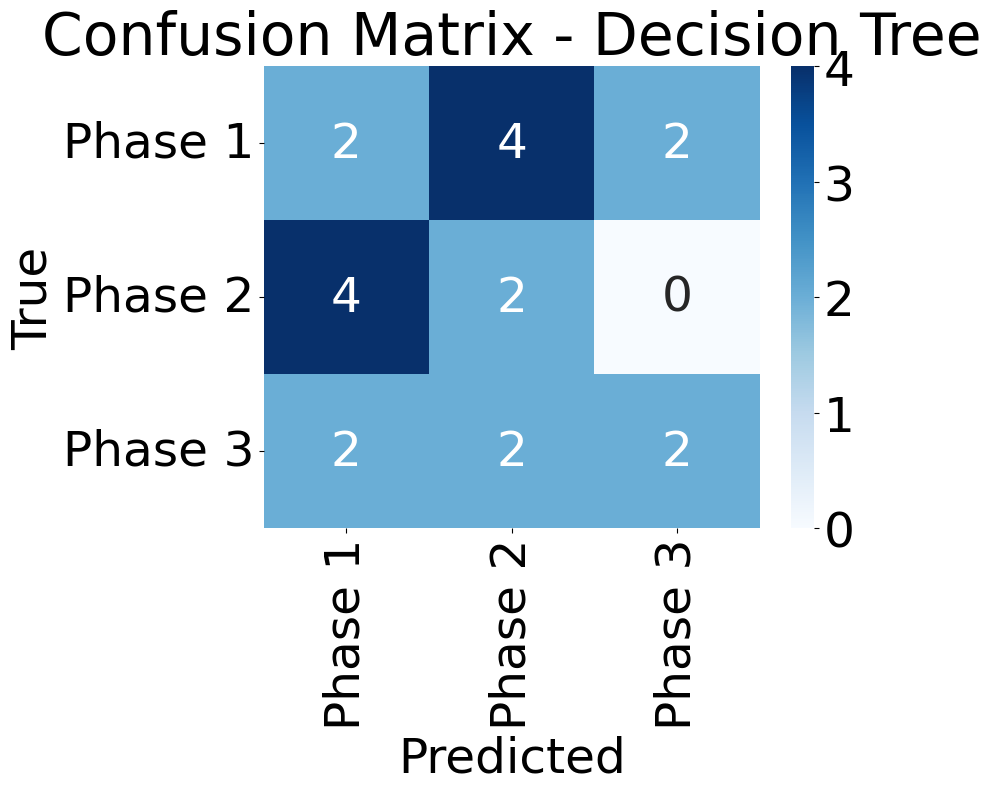

In [334]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



Here's how to interpret this confusion matrix:

1) The number of instances where the true class is 'Phase 1' and the model also predicted 'Phase 1'.
2) The number of instances where the true class is 'Phase 1' but the model predicted 'Phase 2'.
3) The number of instances where the true class is 'Phase 1' but the model predicted 'Phase 3'.
4) The number of instances where the true class is 'Phase 2' but the model predicted 'Phase 1'.
5) The number of instances where the true class is 'Phase 2' and the model also predicted 'Phase 2'.
6) The number of instances where the true class is 'Phase 2' but the model predicted 'Phase 3'.
7) The number of instances where the true class is 'Phase 3' but the model predicted 'Phase 1'.
8) The number of instances where the true class is 'Phase 3' but the model predicted 'Phase 2'.
9) The number of instances where the true class is 'Phase 3' and the model also predicted 'Phase 3'.

Each row represents the true class, and each column represents the predicted class. The diagonal elements represent correct predictions, while the off-diagonal elements represent incorrect predictions.

Phase 1: 2 instances were correctly predicted as Phase 1, 4 instances were incorrectly predicted as Phase 2, and 2 instances were incorrectly predicted as Phase 3.
Phase 2: 4 instances were incorrectly predicted as Phase 1, 2 instances were correctly predicted as Phase 2, and 0 instances were incorrectly predicted as Phase 3.
Phase 3: 2 instances were incorrectly predicted as Phase 1, 2 instances were incorrectly predicted as Phase 2, and 2 instances were correctly predicted as Phase 3.
Classification report:

              precision    recall  f1-score   support

     Phase 1       0.20      0.17      0.18         6
     Phase 2       0.50      0.57      0.53         7
     Phase 3       0.29      0.29      0.29         7

    accuracy                           0.35        20
   macro avg       0.33      0.34      0.33        20
weighted avg       0.34      0.35      0.34        20


Phase 1: The model has a precision of 0.20, meaning that 20% of instances predicted as Phase 1 were actually Phase 1. The recall is 0.17, meaning that the model identified 17% of the actual Phase 1 instances. The f1-score, which is the harmonic mean of precision and recall, is 0.18.
Phase 2: The model has a precision of 0.50, meaning that 50% of instances predicted as Phase 2 were actually Phase 2. The recall is 0.57, meaning that the model identified 57% of the actual Phase 2 instances. The f1-score is 0.53.
Phase 3: The model has a precision of 0.29, meaning that 29% of instances predicted as Phase 3 were actually Phase 3. The recall is 0.29, meaning that the model identified 29% of the actual Phase 3 instances. The f1-score is 0.29.
The overall accuracy of the model is 0.35, meaning that it correctly predicted 35% of the instances. The macro average and weighted average f1-scores are 0.33 and 0.34, respectively.

In summary, the Decision Tree model has relatively low performance in classifying the phases. The model performs better for Phase 2, with a higher precision, recall, and f1-score compared to Phase 1 and Phase 3. The model has the lowest performance for Phase 1.








Considering the classification report and confusion matrix, the model's performance is not optimal. We might want to try different algorithms, feature selection techniques, or additional feature engineering to improve the model's accuracy and classification performance.Yet, the purpose of this notebook is just to introduce these ideas, and the two types of models: 1) **Regression** (run on continuous variables- money, size of a room, number of rooms) and 2) **Classification** (Usually run on non-continuous variables- sick or well, on or off, rich or poor, etc.)

